# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report,precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

# Load the Dataset

In [2]:
file_path = "health_lifestyle_dataset_with_missing_and_duplicates.xlsx"

# Read original dataset
original_df = pd.read_excel(file_path)

print("Dataset Loaded Successfully!\n")
print(original_df.head())

Dataset Loaded Successfully!

    Age  Gender  Occupation  Sleep_hours  Screen_time  Exercise_time  \
0  56.0     1.0         5.0          8.2          5.4            0.5   
1  46.0     1.0         1.0          8.4          5.2            2.8   
2  32.0     1.0         5.0          7.1          3.7            0.0   
3  60.0     1.0         1.0          7.0          2.9            0.0   
4  25.0     0.0         4.0          7.4          3.6            1.8   

   Water_intake  Junk_food_freq  Alcohol    Steps  Meals   BMI  Health_rating  \
0           1.6             4.0      2.0   5965.0    2.0  20.6            5.3   
1           1.7             5.0      5.0  12086.0    5.0  20.1            6.1   
2           1.0             0.0      2.0   5005.0    5.0  19.4            4.3   
3           1.7             7.0      1.0   9073.0    3.0  23.5            1.8   
4           2.2             7.0      1.0  14343.0    3.0  20.0            4.5   

   Stress_level  Happiness_level  Productivity_sco

# Data Cleaning

In [3]:
print("\nChecking Missing Values:")
print(original_df.isnull().sum())

# Fill missing numeric values with median
numeric_cols = original_df.select_dtypes(include=['number']).columns
original_df[numeric_cols] = original_df[numeric_cols].fillna(original_df[numeric_cols].median())

# Fill missing categorical values with mode
cat_cols = original_df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    original_df[col] = original_df[col].fillna(original_df[col].mode()[0])

# Drop duplicate rows
original_df = original_df.drop_duplicates()

print("\nAfter Cleaning:")
print(original_df.isnull().sum())


Checking Missing Values:
Age                   2
Gender                2
Occupation            2
Sleep_hours           2
Screen_time           2
Exercise_time         2
Water_intake          2
Junk_food_freq        2
Alcohol               2
Steps                 2
Meals                 2
BMI                   2
Health_rating         2
Stress_level          2
Happiness_level       2
Productivity_score    2
Sleep_quality         2
Health_category       2
Balanced_life         2
dtype: int64

After Cleaning:
Age                   0
Gender                0
Occupation            0
Sleep_hours           0
Screen_time           0
Exercise_time         0
Water_intake          0
Junk_food_freq        0
Alcohol               0
Steps                 0
Meals                 0
BMI                   0
Health_rating         0
Stress_level          0
Happiness_level       0
Productivity_score    0
Sleep_quality         0
Health_category       0
Balanced_life         0
dtype: int64


In [4]:
df = original_df.copy()

# BMI Distribution

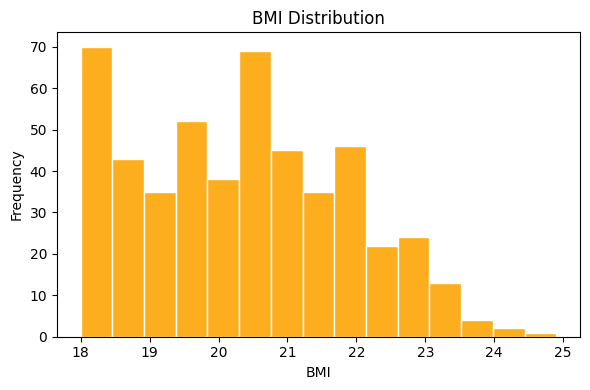

In [5]:
plt.figure(figsize=(6,4))
plt.hist(df['BMI'], bins=15, color="#FCAE1E", edgecolor='white')  
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Stress Level vs Sleep Hours

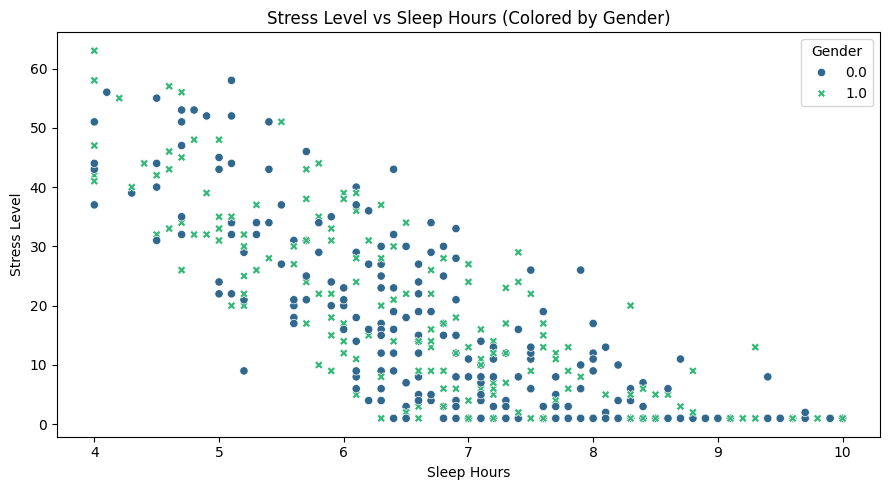

In [6]:
plt.figure(figsize=(9,5))

sns.scatterplot(
    data=df,
    x='Sleep_hours',
    y='Stress_level',
    hue='Gender',        
    style='Gender',      
    palette='viridis'
)

plt.title("Stress Level vs Sleep Hours (Colored by Gender)")
plt.xlabel("Sleep Hours")
plt.ylabel("Stress Level")
plt.tight_layout()
plt.show()


# Correlation Heatmap

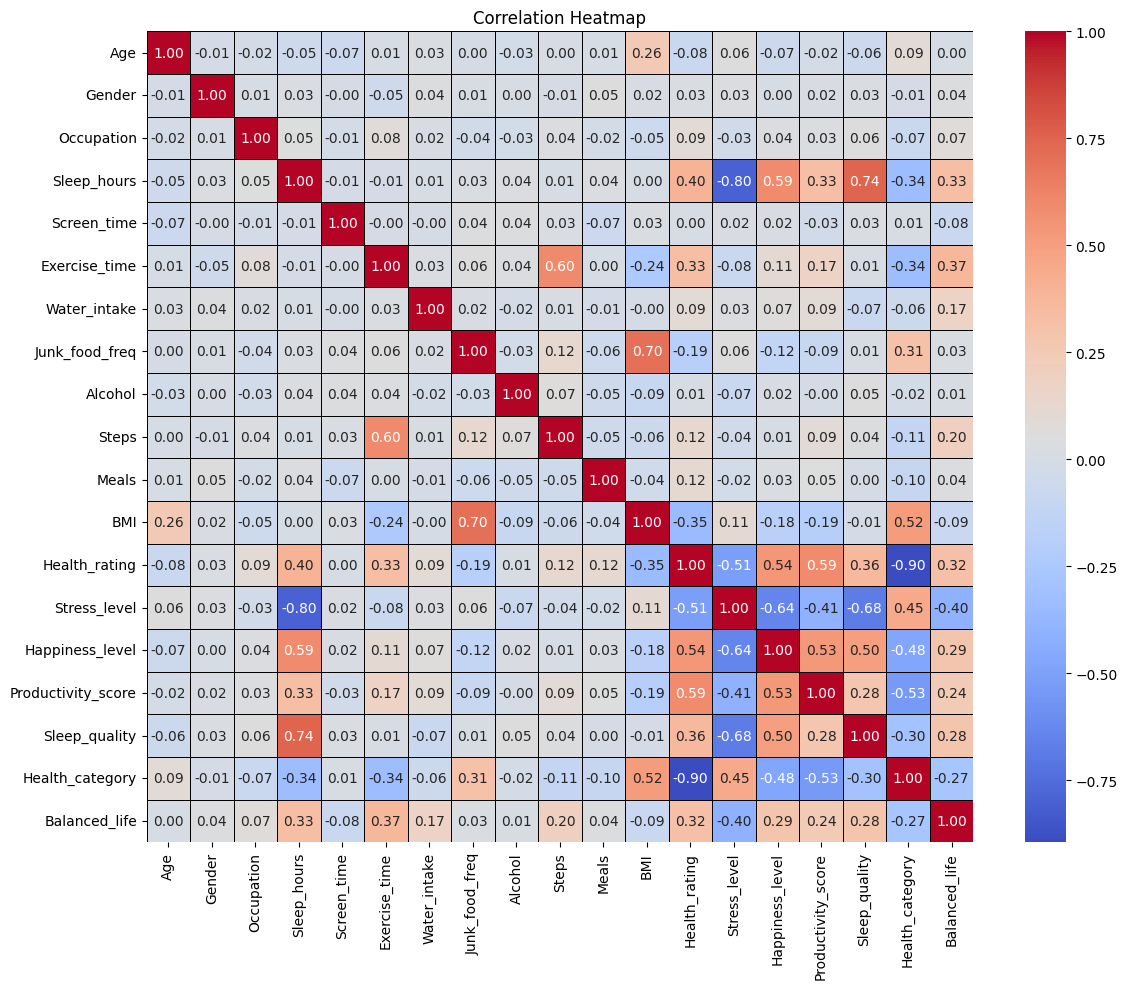

In [7]:
# Calculate correlation matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(
    corr,
    annot=True,          
    fmt=".2f",           
    linewidths=0.5,      
    linecolor='black',   
    cmap='coolwarm',     
    cbar=True
)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Bar Chart: Average Stress Level by Occupation

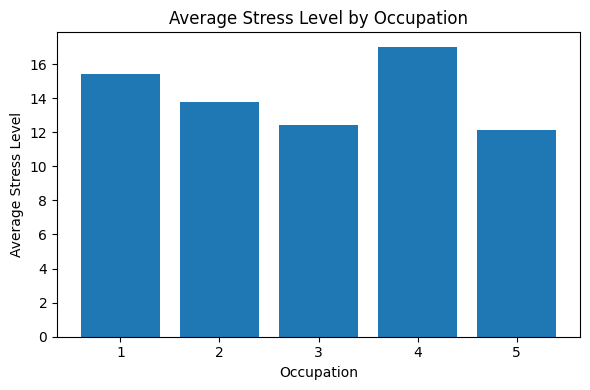

In [8]:
grouped = df.groupby('Occupation')['Stress_level'].mean()

plt.figure(figsize=(6,4))
plt.bar(grouped.index, grouped.values)
plt.title("Average Stress Level by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Average Stress Level")
plt.tight_layout()
plt.show()

# Box Plot: Stress Level by Occupation

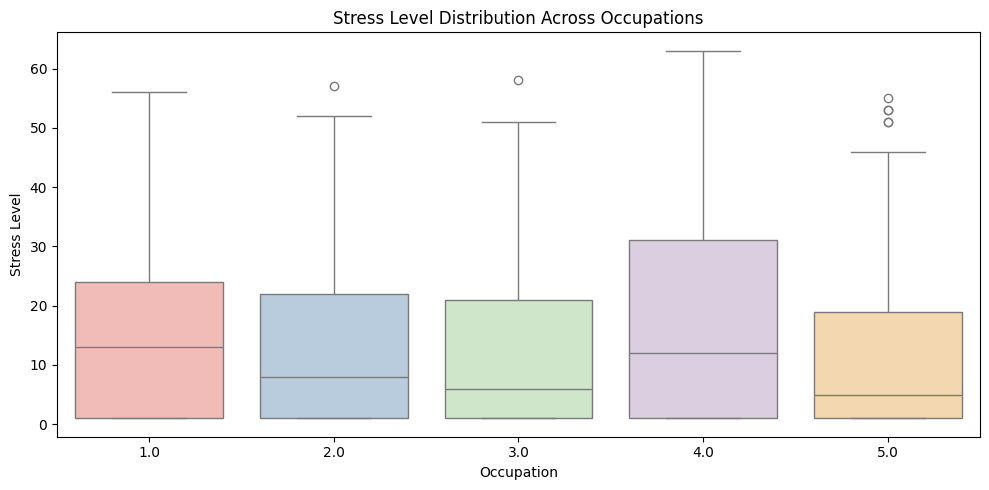

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Occupation', y='Stress_level', data=df, palette='Pastel1',hue='Occupation',legend=False)
plt.title("Stress Level Distribution Across Occupations")
plt.xlabel("Occupation")
plt.ylabel("Stress Level")
plt.tight_layout()
plt.show()

In [10]:
# Create a safe copy
df = original_df.copy()

# BMI Prediction

## 1. Linear Regression


Regression Metrics:
MAE : 0.898777075791299
MSE : 1.163208131405895
RMSE: 1.0785212707248268
R2 Score: 0.2848028232593045

Accuracy Score: 0.9


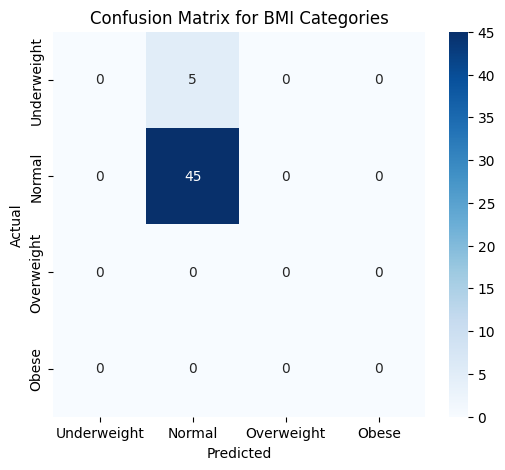


Classification Report:



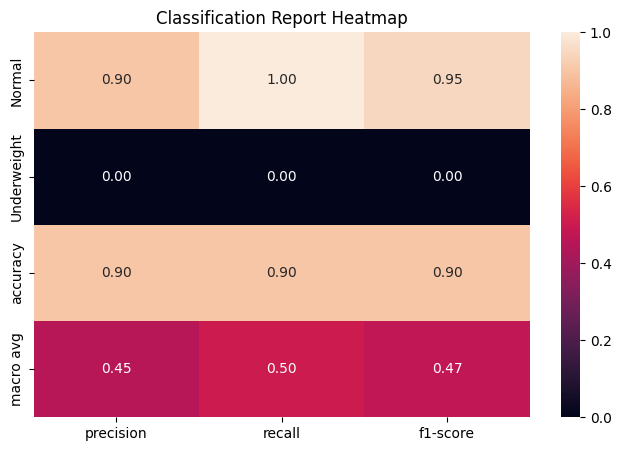

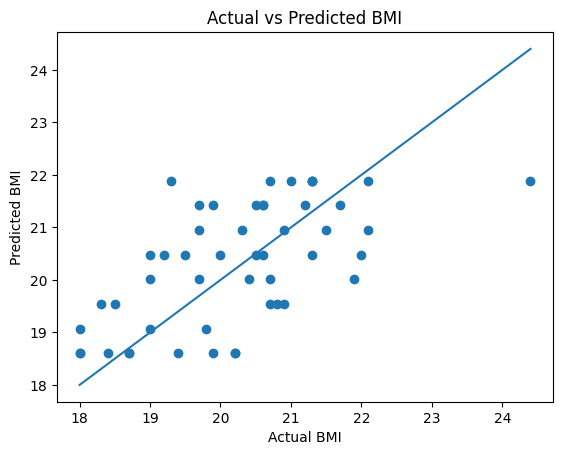

In [11]:
# Copy dataset
df_lr = original_df.copy()

# Select Target and Features
target = 'BMI'   # Target variable

X = df_lr[['Junk_food_freq']]   # Feature
y = df_lr[target]

# Encode categorical variables 
X = pd.get_dummies(X, drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics (Regression)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRegression Metrics:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

# Convert BMI into categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Convert actual and predicted BMI to categories
y_test_cat = y_test.apply(bmi_category)
y_pred_cat = pd.Series(y_pred).apply(bmi_category)

# Accuracy Score
acc = accuracy_score(y_test_cat, y_pred_cat)
print("\nAccuracy Score:", acc)

# Confusion Matrix
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for BMI Categories")
plt.show()

# Classification Report
print("\nClassification Report:\n")
report = classification_report(y_test_cat, y_pred_cat, output_dict=True,zero_division=0)
df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(df.iloc[:-1, :-1], annot=True, fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()


# Actual vs Predicted Plot
plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI")
plt.show()

## 2. Polynomial Regression

Dataset copied successfully!


Feature shape after encoding: (499, 18)

Polynomial Regression Results:

Degree 1 → Accuracy: 0.8700
Degree 2 → Accuracy: 0.8800
Degree 3 → Accuracy: 0.8400
Degree 4 → Accuracy: 0.8400
Degree 5 → Accuracy: 0.8400

 BEST DEGREE = 2  (Accuracy = 0.8800)



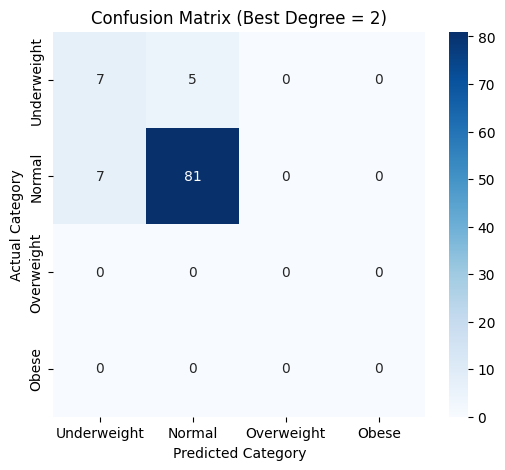

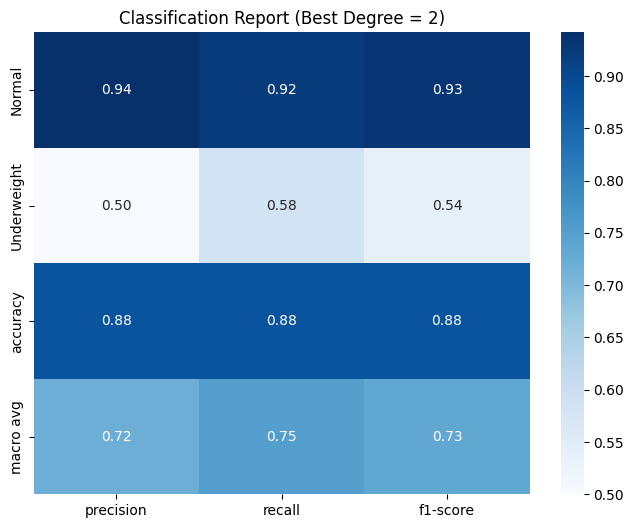

In [12]:
# Copy dataset
df1 = original_df.copy()
print("Dataset copied successfully!\n")

# Select Target and Features
target = 'BMI'
X = df1.drop(columns=[target])
y = df1[target]

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)
print("\nFeature shape after encoding:", X.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store results
degrees = [1, 2, 3, 4, 5]
results = []

# Function to convert BMI → category
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

print("\nPolynomial Regression Results:\n")

# For each degree
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    # Convert continuous → category
    y_test_cat = y_test.apply(bmi_category)
    y_pred_cat = pd.Series(y_pred).apply(bmi_category)

    # Classification accuracy
    acc = accuracy_score(y_test_cat, y_pred_cat)

    print(f"Degree {d} → Accuracy: {acc:.4f}")

    results.append((d, acc, y_pred, y_pred_cat))

# Identify BEST degree
best_degree, best_acc, best_pred, best_pred_cat = max(results, key=lambda x: x[1])
print("\n======================================")
print(f" BEST DEGREE = {best_degree}  (Accuracy = {best_acc:.4f})")
print("======================================\n")

# Confusion Matrix for BEST degree
labels = ["Underweight", "Normal", "Overweight", "Obese"]

y_test_cat = y_test.apply(bmi_category)

cm = confusion_matrix(y_test_cat, best_pred_cat, labels=labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.title(f"Confusion Matrix (Best Degree = {best_degree})")
plt.show()

# Classification Report Heatmap
report = classification_report(y_test_cat, best_pred_cat, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title(f"Classification Report (Best Degree = {best_degree})")
plt.show()


## 3. KNN Regressor

Dataset copied into knn_df successfully!


Feature shape: (499, 18)

KNN Regression Results (BMI Prediction):

--- K = 11 ---
Accuracy Score: 0.88

Confusion Matrix:
 [[ 0 12  0  0]
 [ 0 88  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

 Underweight       0.00      0.00      0.00        12
      Normal       0.88      1.00      0.94        88
  Overweight       0.00      0.00      0.00         0
       Obese       0.00      0.00      0.00         0

    accuracy                           0.88       100
   macro avg       0.22      0.25      0.23       100
weighted avg       0.77      0.88      0.82       100

----------------------------------------
--- K = 20 ---
Accuracy Score: 0.88

Confusion Matrix:
 [[ 0 12  0  0]
 [ 0 88  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

 Underweight       0.00      0.00      0.00        12
      Normal       0

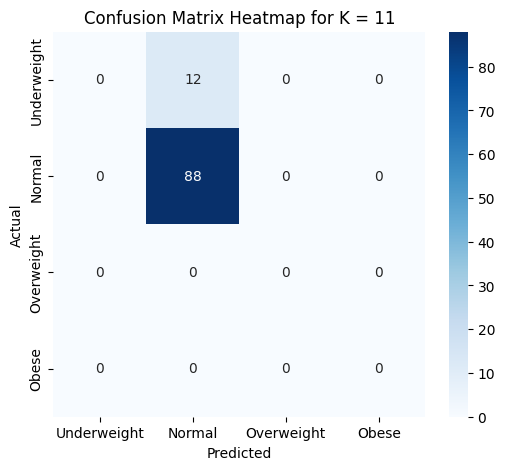

In [13]:
# Safe copy for KNN
knn_df = original_df.copy()
print("Dataset copied into knn_df successfully!\n")

# Select Target and Features
target = 'BMI'
X = knn_df.drop(columns=[target])
y = knn_df[target]

# One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)
print("\nFeature shape:", X.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Regressor with multiple K values
k_values = [11, 20, 21, 22, 23, 30]
results = []

print("\nKNN Regression Results (BMI Prediction):\n")

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Convert BMI to categories
    def bmi_category(bmi):
        if bmi < 18.5:
            return 'Underweight'
        elif bmi < 25:
            return 'Normal'
        elif bmi < 30:
            return 'Overweight'
        else:
            return 'Obese'

    y_test_cat = y_test.apply(bmi_category)
    y_pred_cat = pd.Series(y_pred).apply(bmi_category)

    # Classification metrics
    acc = accuracy_score(y_test_cat, y_pred_cat)
    cm = confusion_matrix(y_test_cat, y_pred_cat, labels=['Underweight','Normal','Overweight','Obese'])
    report = classification_report(y_test_cat, y_pred_cat, labels=['Underweight','Normal','Overweight','Obese'],zero_division=0)

    print(f"--- K = {k} ---")
    print("Accuracy Score:", acc)
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    print("-" * 40)

    results.append((k, acc, cm, report))

# Find best K based on accuracy
best_k_info = max(results, key=lambda x: x[1])
best_k = best_k_info[0]
best_acc = best_k_info[1]
best_cm = best_k_info[2]
best_report = best_k_info[3]

print(f"\nBest K: {best_k} with Accuracy: {best_acc:.4f}")

# Heatmap for best K
plt.figure(figsize=(6,5))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Underweight','Normal','Overweight','Obese'],
            yticklabels=['Underweight','Normal','Overweight','Obese'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix Heatmap for K = {best_k}")
plt.show()


## 4. Decision Tree Regressor

Dataset copied into dt_df

Selected Useful Features:
Index(['Age', 'Exercise_time', 'Junk_food_freq', 'Health_rating',
       'Health_category'],
      dtype='object')

Decision Tree Regression Results (BMI Prediction):

--- max_depth = 2 ---
Accuracy Score: 0.88

Confusion Matrix:
 [[ 0 12  0  0]
 [ 0 88  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]

Classification Report:
               precision    recall  f1-score   support

 Underweight       0.00      0.00      0.00        12
      Normal       0.88      1.00      0.94        88
  Overweight       0.00      0.00      0.00         0
       Obese       0.00      0.00      0.00         0

    accuracy                           0.88       100
   macro avg       0.22      0.25      0.23       100
weighted avg       0.77      0.88      0.82       100

----------------------------------------
--- max_depth = 3 ---
Accuracy Score: 0.88

Confusion Matrix:
 [[ 0 12  0  0]
 [ 0 88  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]

Classification Report:
      

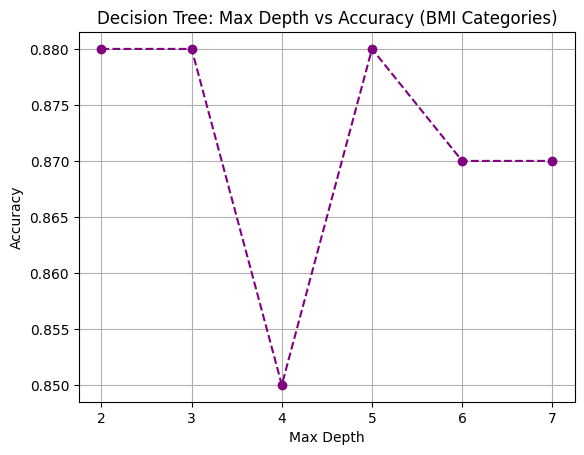

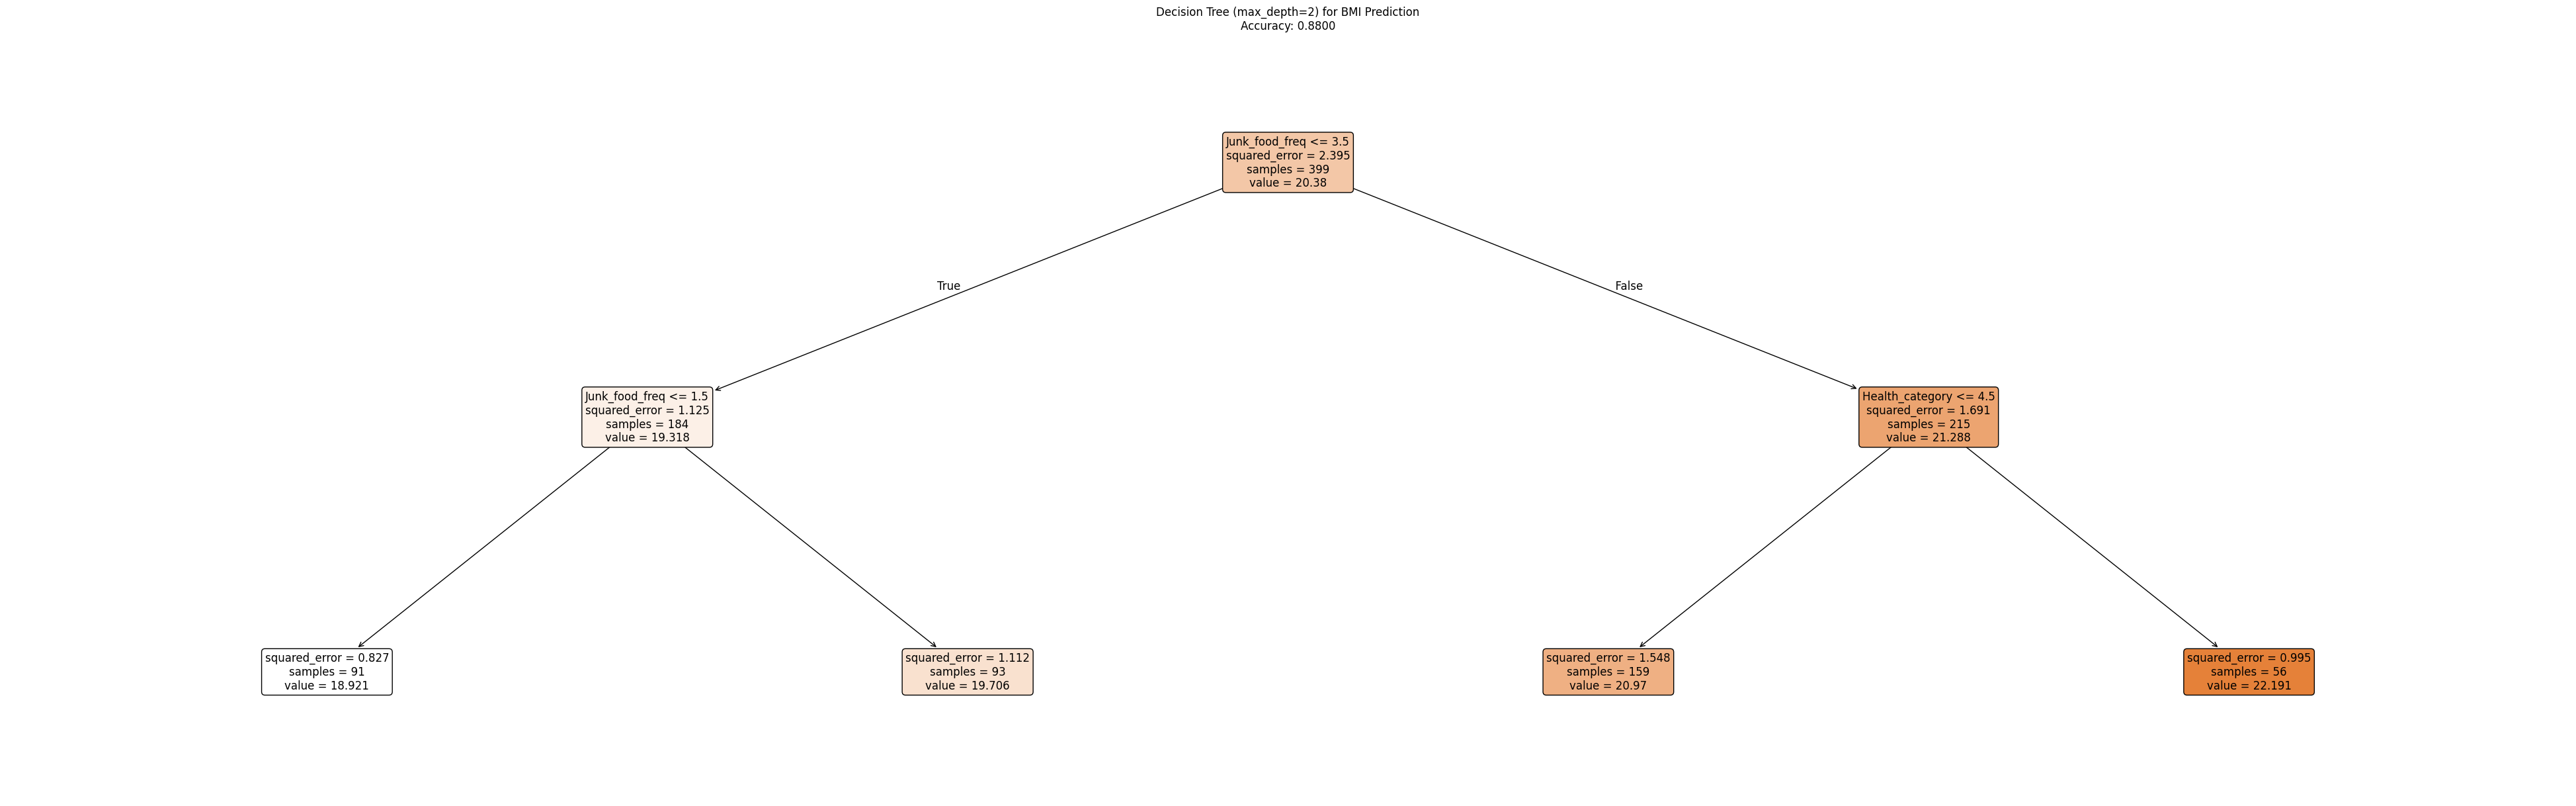

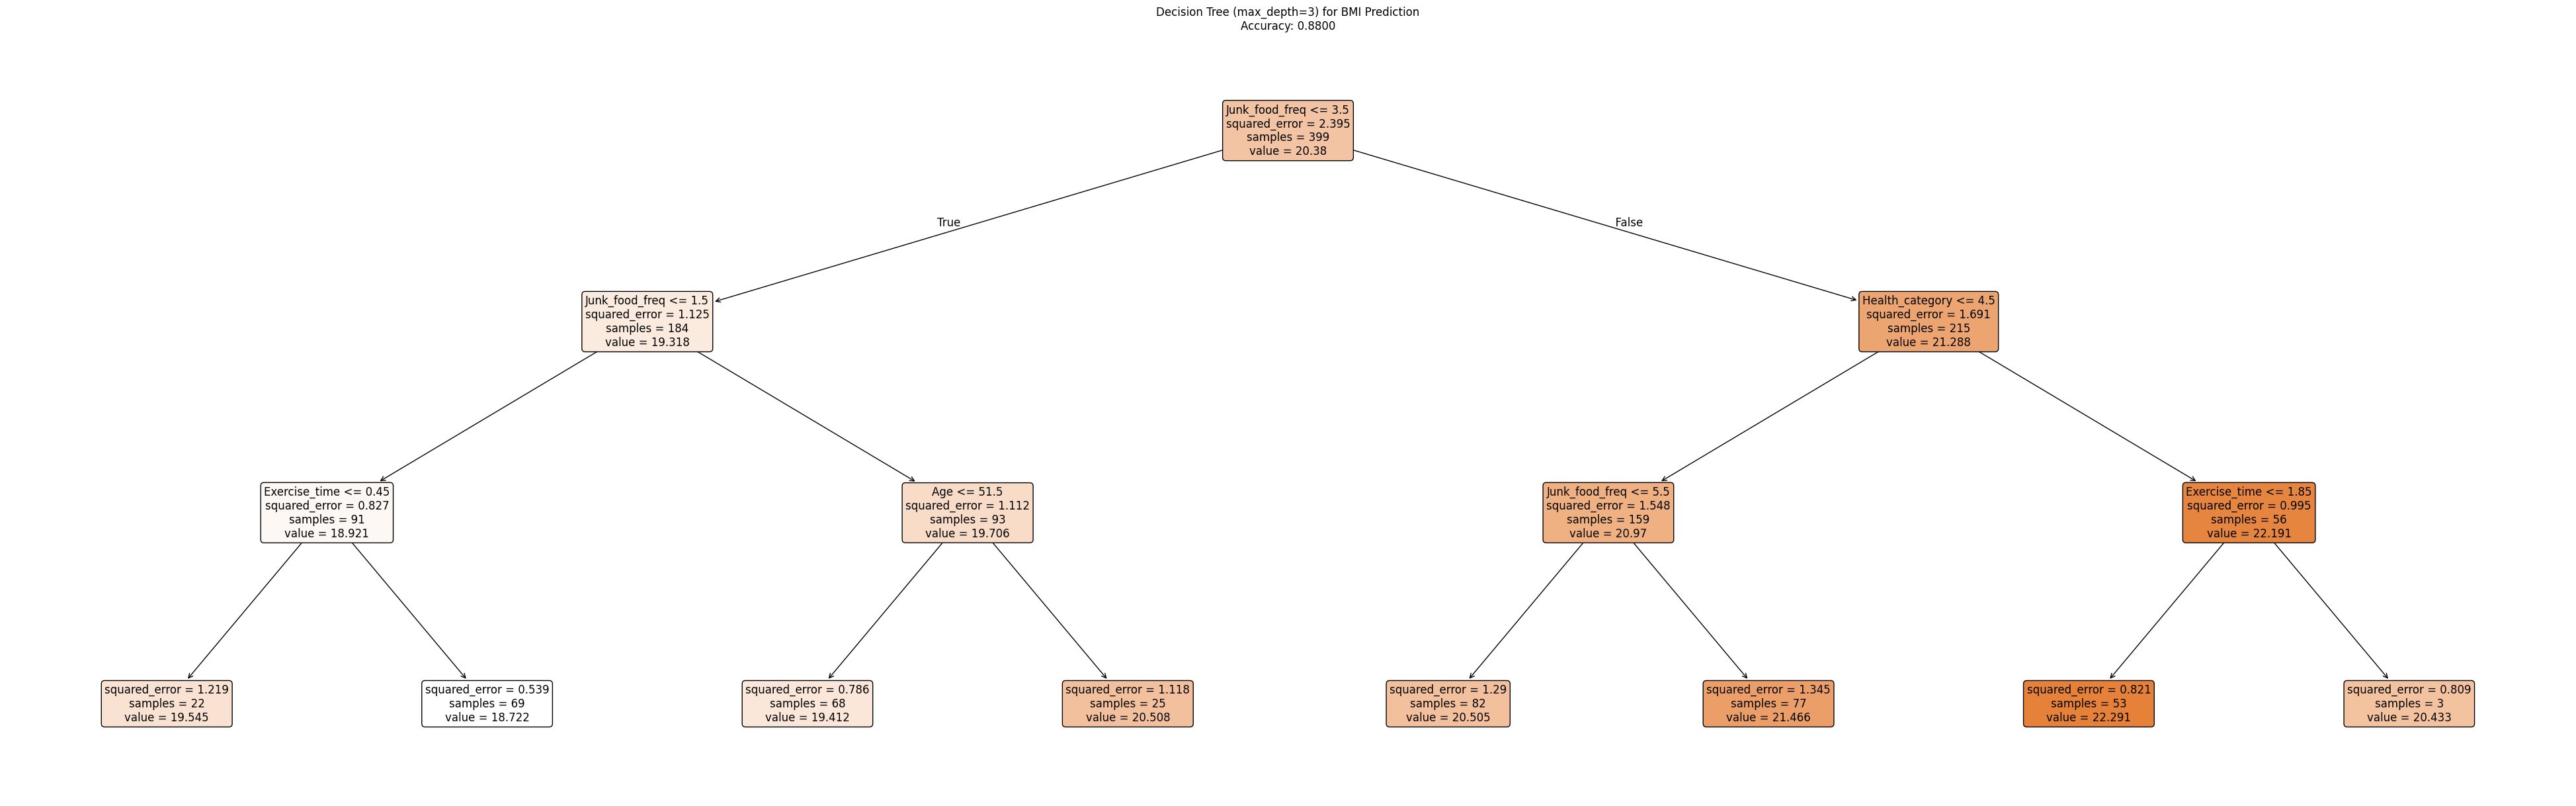

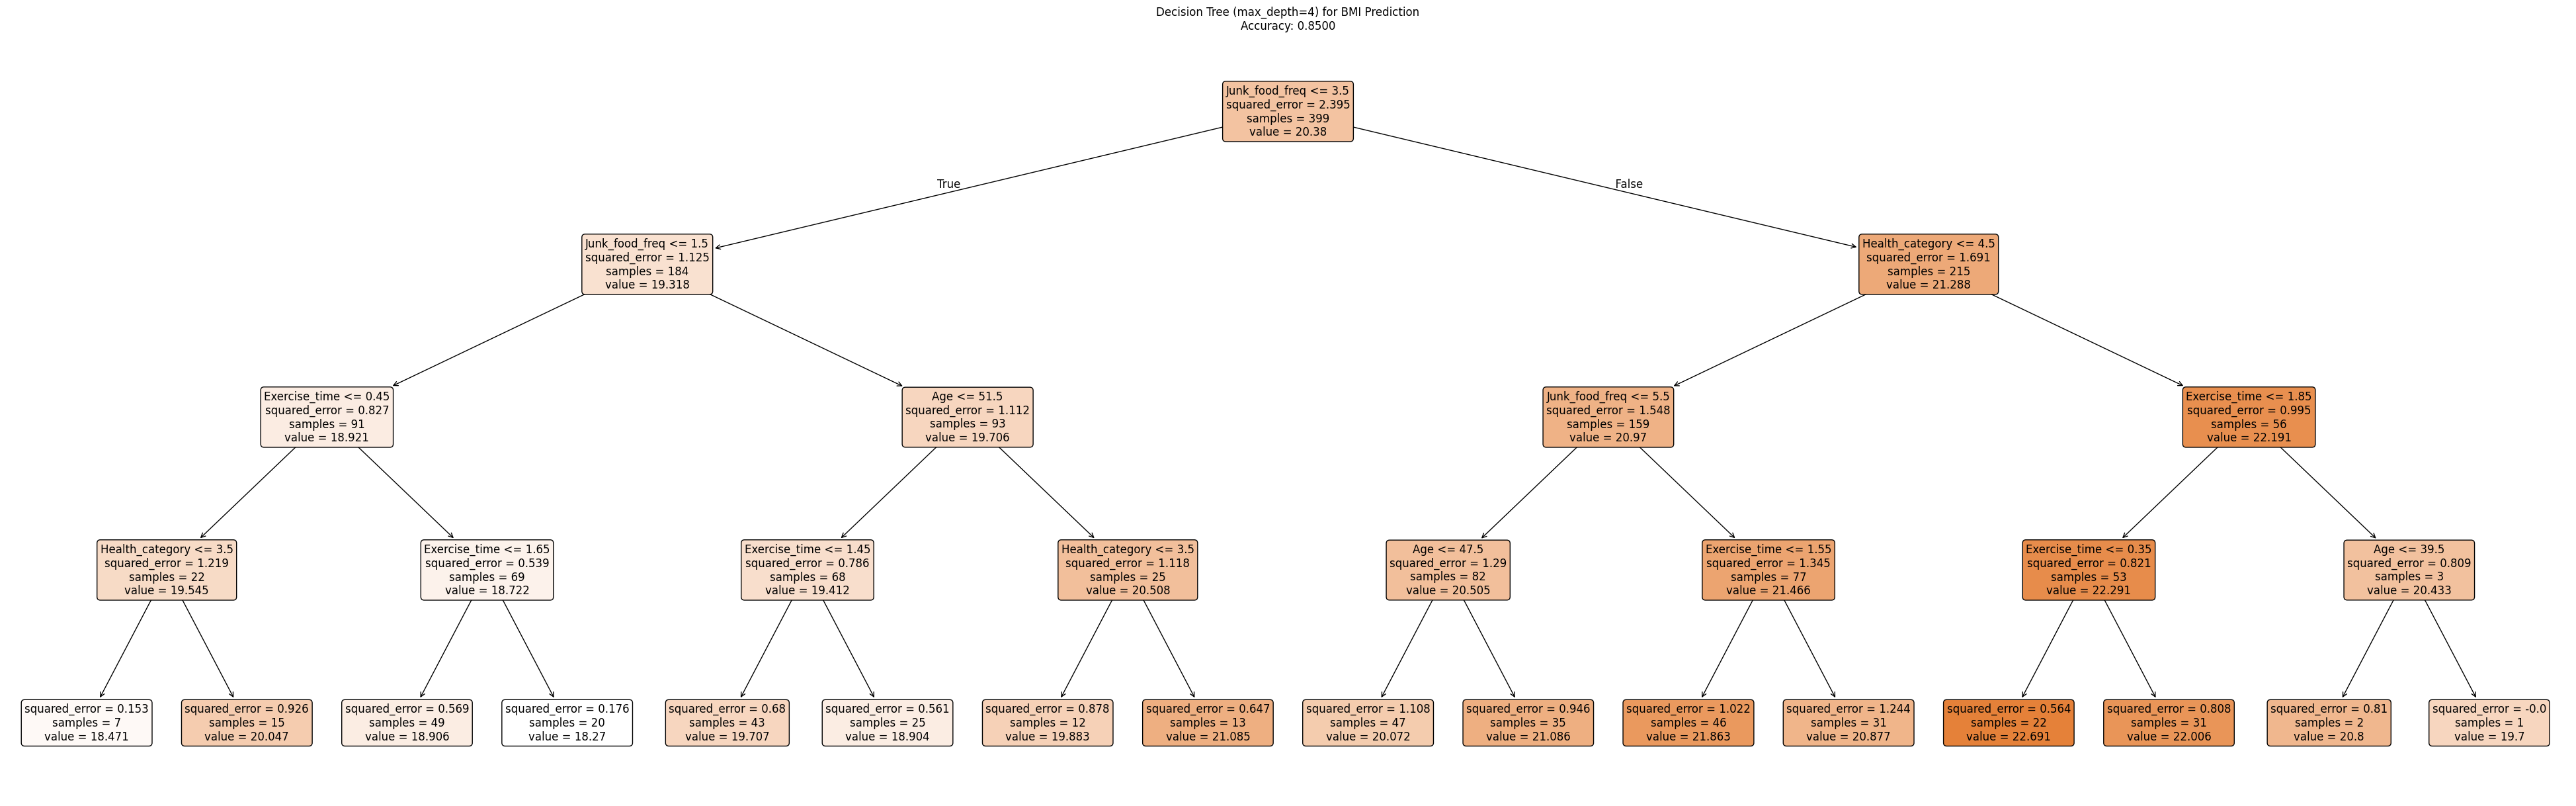

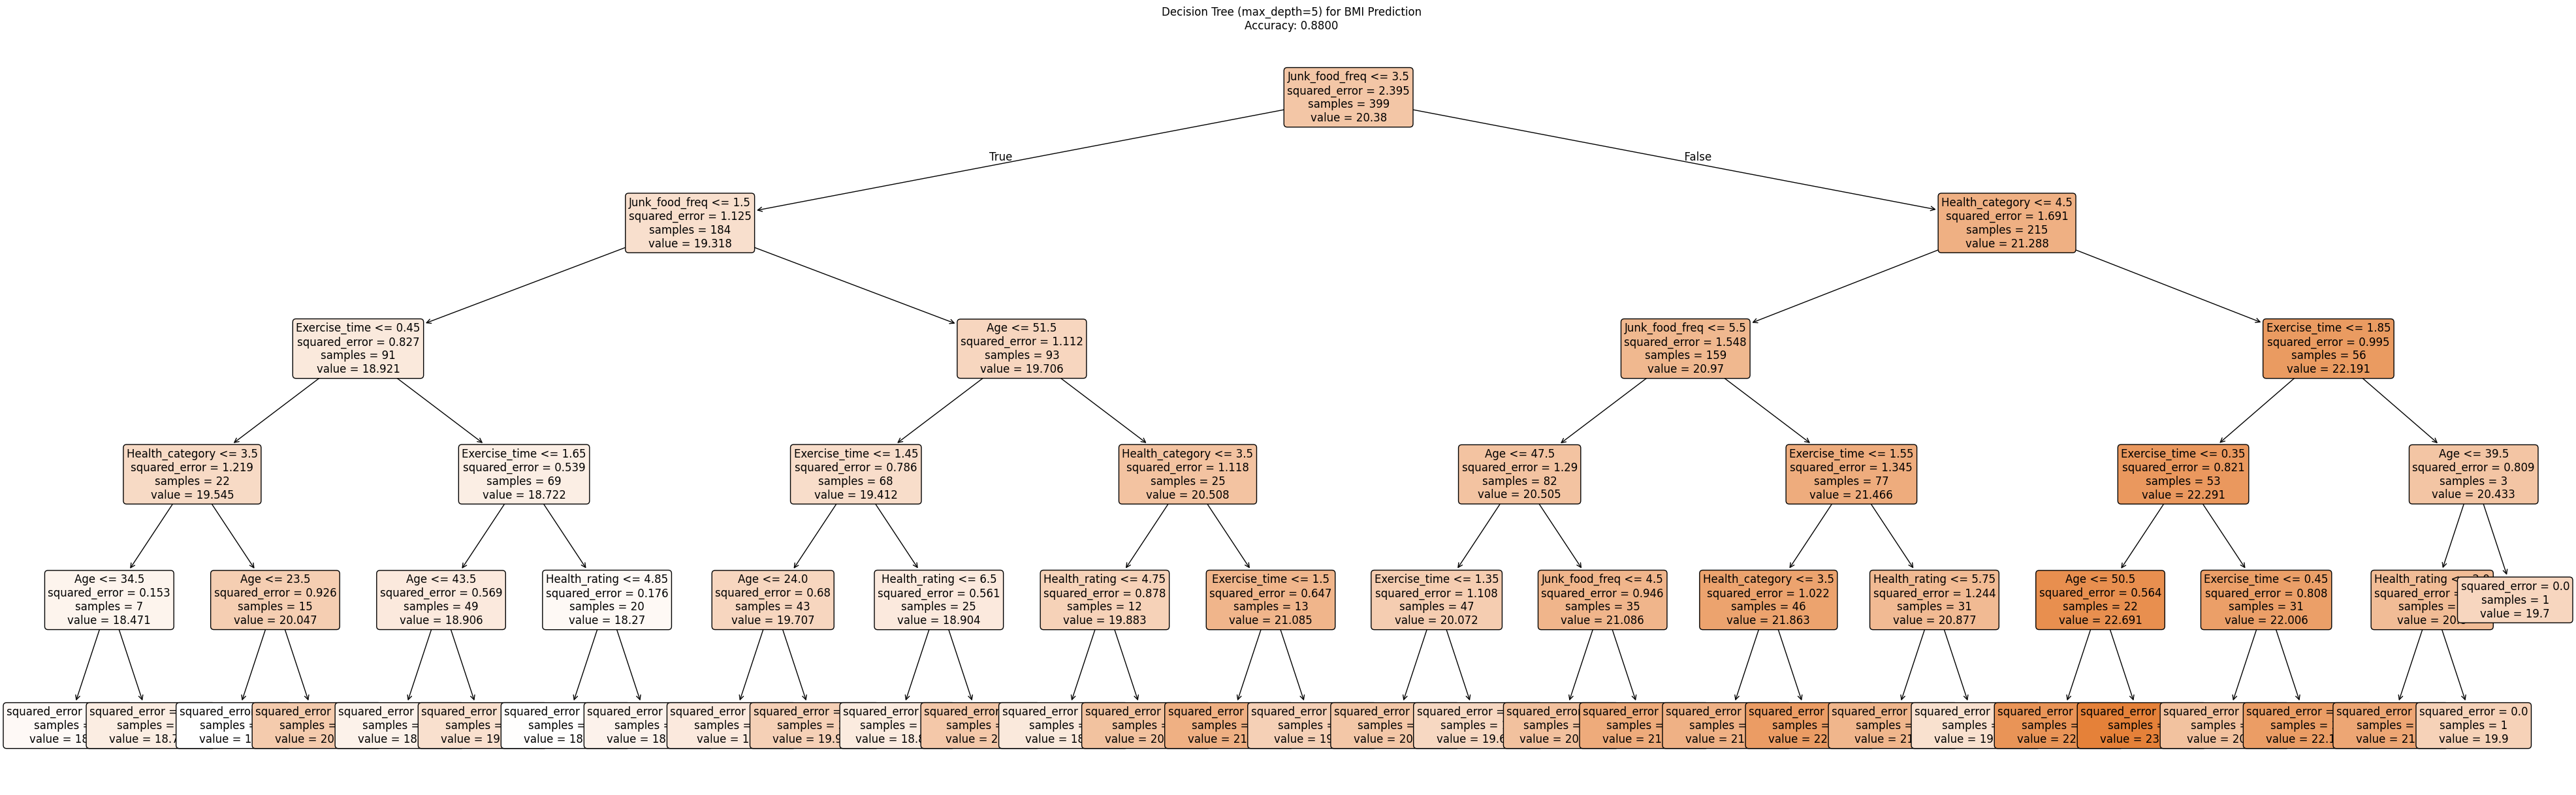

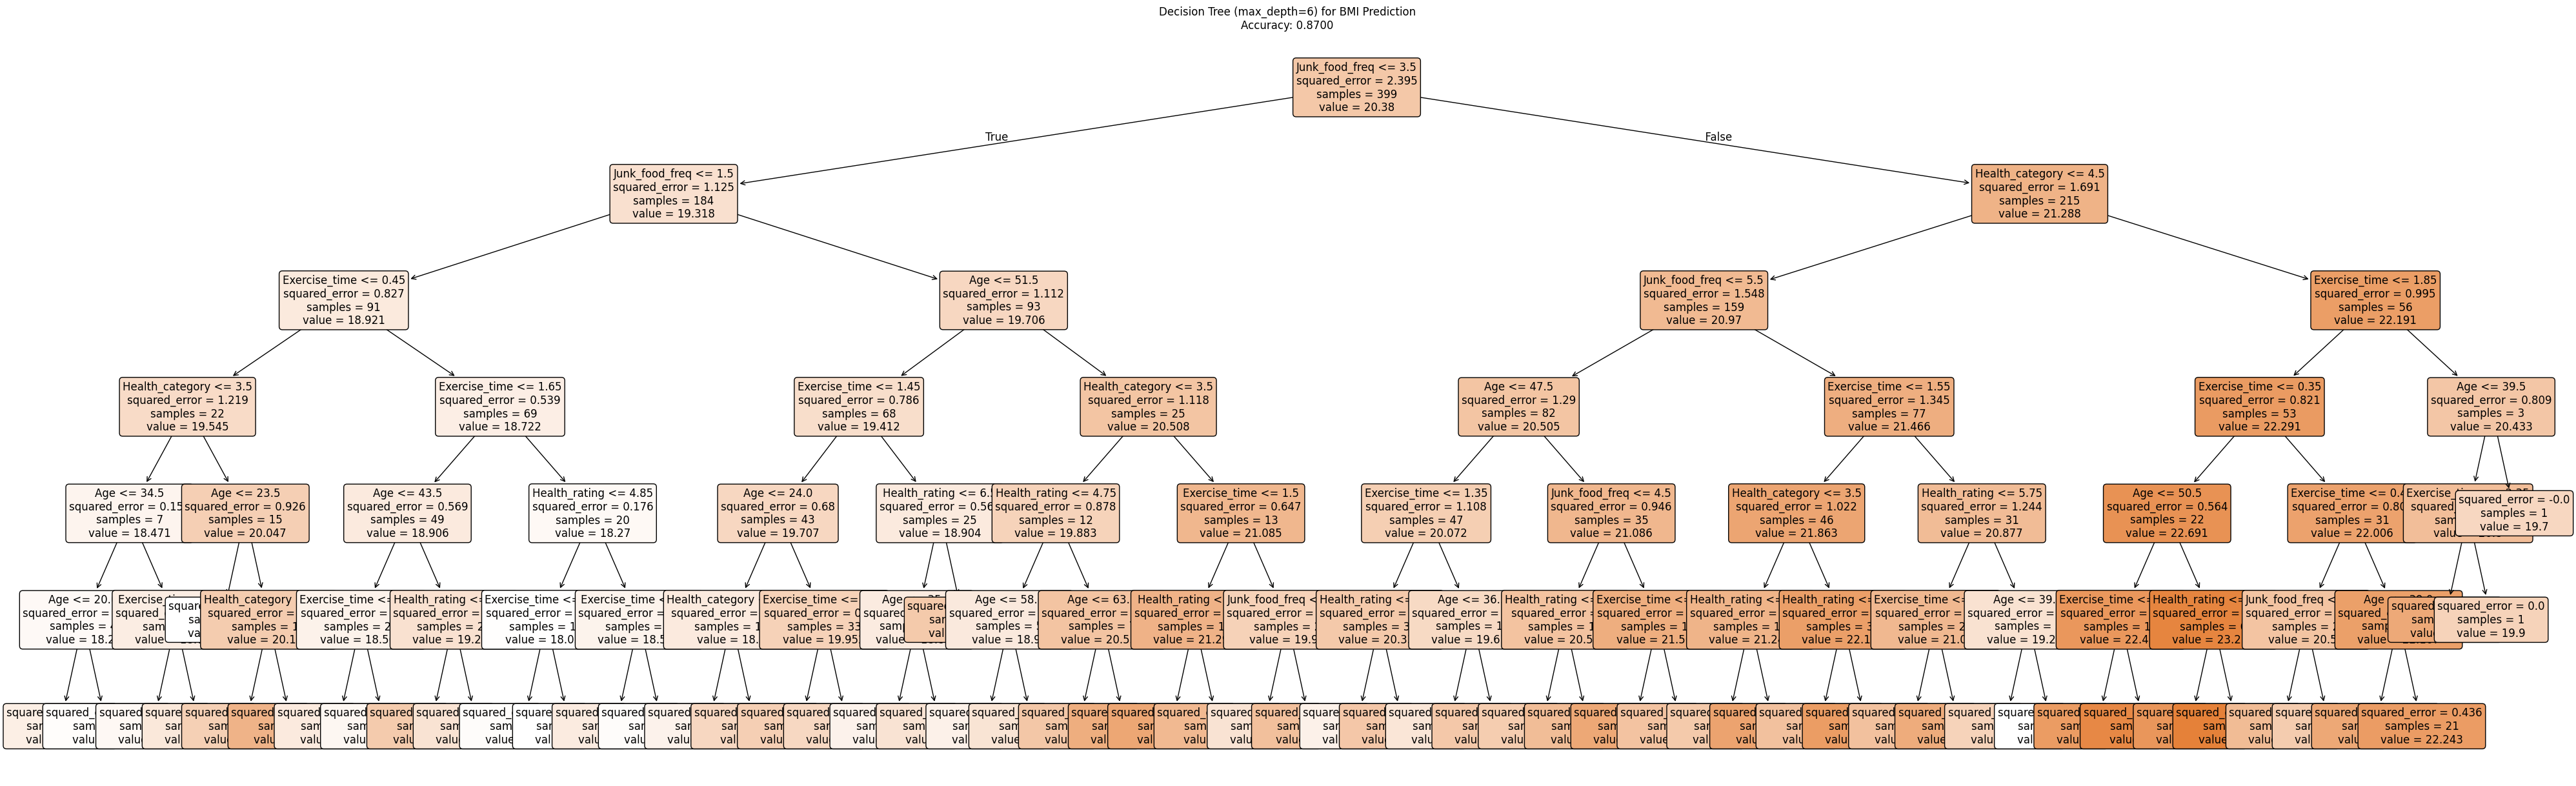

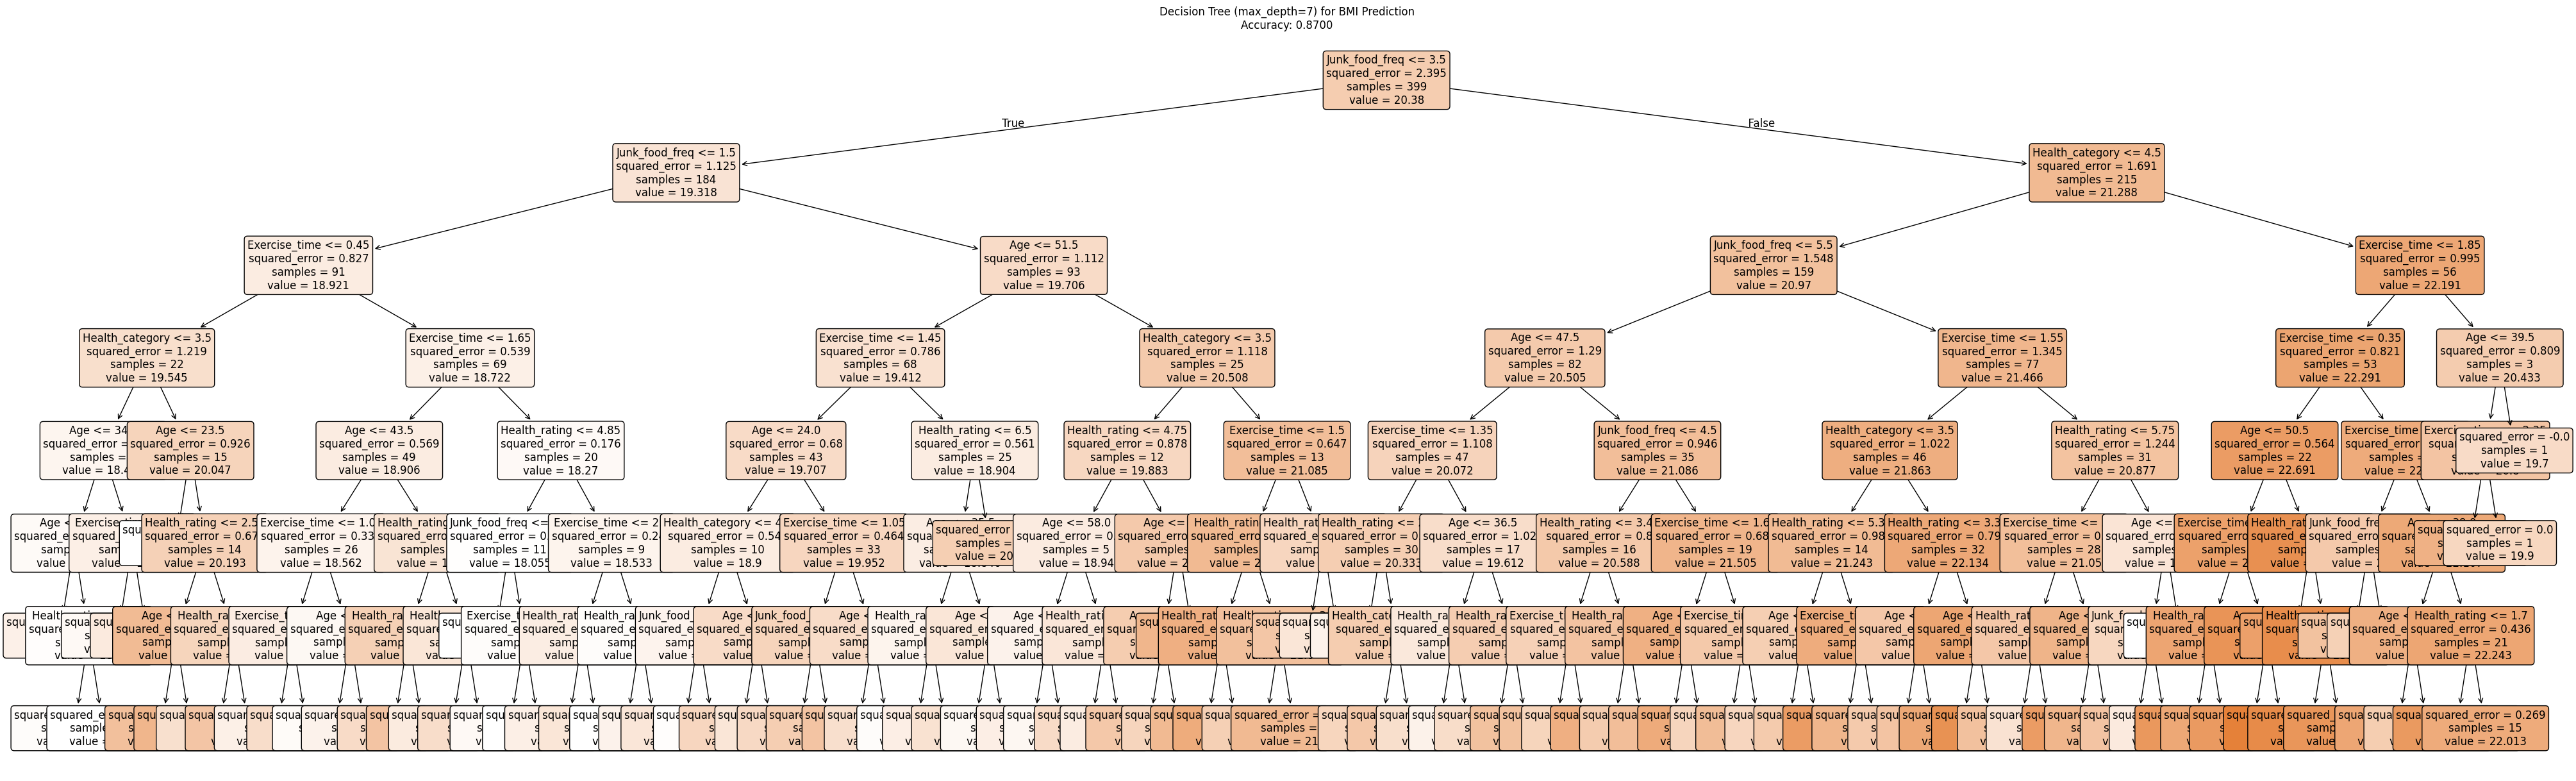


Best max_depth: 2 with Accuracy: 0.8800


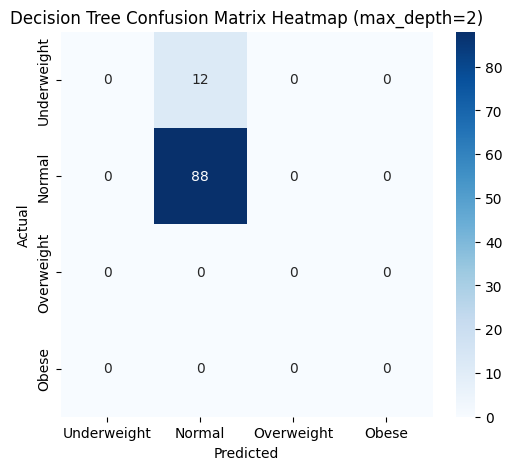

In [14]:
# Safe copy
dt_df = original_df.copy()
print("Dataset copied into dt_df")

# Select Target and Features
target = 'BMI'
X = dt_df.drop(columns=[target])
y = dt_df[target]

# Encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# Feature Selection (top 10 useful ones)
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nSelected Useful Features:")
print(selected_features)

# Different max_depth values to test
depth_values = [2, 3, 4, 5, 6, 7]
results = []

print("\nDecision Tree Regression Results (BMI Prediction):\n")

for depth in depth_values:
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.20, random_state=42
    )

    # Train Decision Tree Regressor
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Convert BMI to categories
    def bmi_category(bmi):
        if bmi < 18.5:
            return 'Underweight'
        elif bmi < 25:
            return 'Normal'
        elif bmi < 30:
            return 'Overweight'
        else:
            return 'Obese'

    y_test_cat = y_test.apply(bmi_category)
    y_pred_cat = pd.Series(y_pred).apply(bmi_category)

    # Classification metrics
    acc = accuracy_score(y_test_cat, y_pred_cat)
    cm = confusion_matrix(y_test_cat, y_pred_cat, labels=['Underweight','Normal','Overweight','Obese'])
    report = classification_report(y_test_cat, y_pred_cat, labels=['Underweight','Normal','Overweight','Obese'],zero_division=0)

    print(f"--- max_depth = {depth} ---")
    print("Accuracy Score:", acc)
    print("\nConfusion Matrix:\n", cm)
    print("\nClassification Report:\n", report)
    print("-" * 40)

    results.append((depth, acc, cm, report, model))

# Extract accuracy for plotting
depth_list = [r[0] for r in results]
acc_list = [r[1] for r in results]

# Plot Accuracy vs max_depth
plt.figure()
plt.plot(depth_list, acc_list, marker='o', linestyle='--', color='purple')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Max Depth vs Accuracy (BMI Categories)")
plt.xticks(depth_values)
plt.grid(True)
plt.show()

# Plot Decision Trees for all depths
for depth, acc, cm, report, model in results:
    plt.figure(figsize=(50,15))
    plot_tree(
        model,
        feature_names=selected_features,
        filled=True,
        rounded=True,
        fontsize=12
    )
    plt.title(f"Decision Tree (max_depth={depth}) for BMI Prediction\nAccuracy: {acc:.4f}")
    plt.show()

# Identify best depth based on accuracy
best_depth_info = max(results, key=lambda x: x[1])
best_depth = best_depth_info[0]
best_acc = best_depth_info[1]
best_cm = best_depth_info[2]
best_report = best_depth_info[3]
best_model = best_depth_info[4]

print(f"\nBest max_depth: {best_depth} with Accuracy: {best_acc:.4f}")

# Heatmap for best depth
plt.figure(figsize=(6,5))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Underweight','Normal','Overweight','Obese'],
            yticklabels=['Underweight','Normal','Overweight','Obese'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Decision Tree Confusion Matrix Heatmap (max_depth={best_depth})")
plt.show()


## 5. Random Forest

Selected Useful Features:
Index(['Age', 'Exercise_time', 'Junk_food_freq', 'Alcohol', 'Steps',
       'Health_rating', 'Health_category'],
      dtype='object')

Random Forest Classification Results:

--- n_estimators=50, max_depth=3 ---
Accuracy: 0.88
Confusion Matrix:
 [[87  1]
 [11  1]]
Classification Report:
               precision    recall  f1-score   support

      Normal       0.89      0.99      0.94        88
 Underweight       0.50      0.08      0.14        12

    accuracy                           0.88       100
   macro avg       0.69      0.54      0.54       100
weighted avg       0.84      0.88      0.84       100

--------------------------------------------------
--- n_estimators=50, max_depth=5 ---
Accuracy: 0.88
Confusion Matrix:
 [[86  2]
 [10  2]]
Classification Report:
               precision    recall  f1-score   support

      Normal       0.90      0.98      0.93        88
 Underweight       0.50      0.17      0.25        12

    accuracy                 

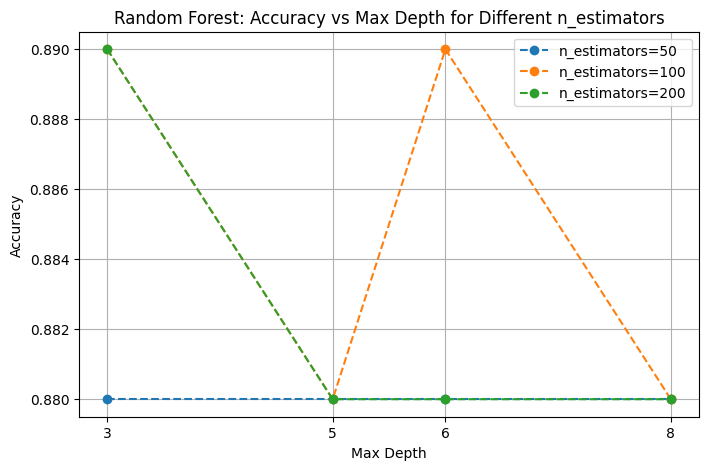


Best Random Forest: n_estimators=100, max_depth=3 with Accuracy=0.8900


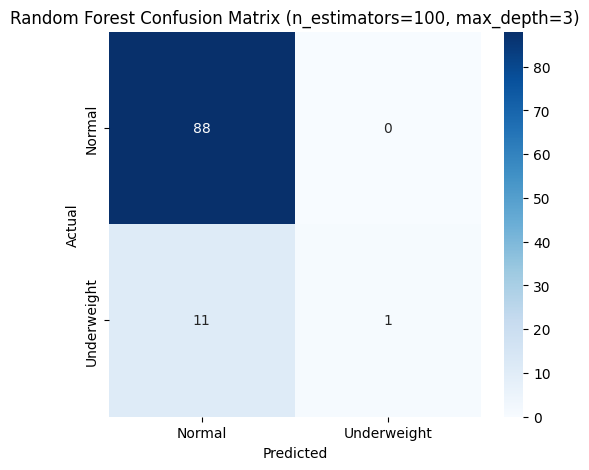

In [15]:
# Copy original data
rf_df = original_df.copy()

# Convert BMI into categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

# Create target classification column
rf_df['BMI_Category'] = rf_df['BMI'].apply(bmi_category)

# Select target and features
target = 'BMI_Category'
X = rf_df.drop(columns=['BMI', target])
y = rf_df[target]

# Encode categorical feature columns
X = pd.get_dummies(X, drop_first=True)

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Useful Features:")
print(selected_features)

# Hyperparameter values to test
n_estimators_list = [50, 100, 200]
max_depth_list = [3, 5, 6, 8]
results = []

print("\nRandom Forest Classification Results:\n")

# Store accuracy for plotting
accuracy_dict = {n: [] for n in n_estimators_list}

for n in n_estimators_list:
    for depth in max_depth_list:
        # Train-Test split
        X_train, X_test, y_train, y_test = train_test_split(
            X_selected, y, test_size=0.2, random_state=42
        )

        # Train Random Forest Classifier
        rf_model = RandomForestClassifier(
            n_estimators=n, max_depth=depth, random_state=42
        )
        rf_model.fit(X_train, y_train)

        # Prediction
        y_pred = rf_model.predict(X_test)

        # Accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracy_dict[n].append(acc)

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Classification report
        report = classification_report(y_test, y_pred, target_names=le.classes_)

        print(f"--- n_estimators={n}, max_depth={depth} ---")
        print("Accuracy:", acc)
        print("Confusion Matrix:\n", cm)
        print("Classification Report:\n", report)
        print("-" * 50)

        results.append((n, depth, acc, cm, report, rf_model))

# Plot Accuracy vs Max Depth for each n_estimators
plt.figure(figsize=(8,5))
for n in n_estimators_list:
    plt.plot(max_depth_list, accuracy_dict[n], marker='o', linestyle='--', label=f'n_estimators={n}')

plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Random Forest: Accuracy vs Max Depth for Different n_estimators")
plt.xticks(max_depth_list)
plt.grid(True)
plt.legend()
plt.show()

# Find best combination based on accuracy
best_rf_info = max(results, key=lambda x: x[2])
best_n = best_rf_info[0]
best_depth = best_rf_info[1]
best_acc = best_rf_info[2]
best_cm = best_rf_info[3]
best_report = best_rf_info[4]
best_model = best_rf_info[5]

print(f"\nBest Random Forest: n_estimators={best_n}, max_depth={best_depth} with Accuracy={best_acc:.4f}")

# Heatmap for best Random Forest
plt.figure(figsize=(6,5))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Random Forest Confusion Matrix (n_estimators={best_n}, max_depth={best_depth})")
plt.show()


## 6. Support Vector Regressor (SVR)

Selected Features: Index(['Age', 'Exercise_time', 'Junk_food_freq', 'Alcohol', 'BMI',
       'Health_rating', 'Health_category'],
      dtype='object')
Accuracy Score: 0.97
Confusion Matrix:
 [[11  3  0  0]
 [ 0 86  0  0]
 [ 0  0  0  0]
 [ 0  0  0  0]]

Classification Report:

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.98        86
 Underweight       1.00      0.79      0.88        14

    accuracy                           0.97       100
   macro avg       0.98      0.89      0.93       100
weighted avg       0.97      0.97      0.97       100



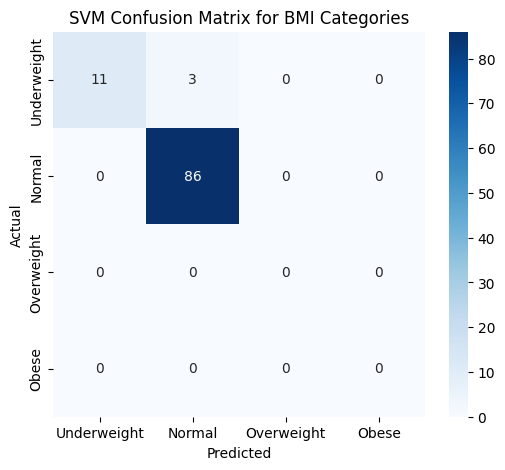

In [16]:
svm_df = original_df.copy()

# Convert BMI into categories-
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

svm_df['BMI_Category'] = svm_df['BMI'].apply(bmi_category)

# Select Features and Target
target = 'BMI_Category'


X = svm_df.drop(columns=[target])
y = svm_df[target]

# Encode categorical columns if any
cat_cols = X.select_dtypes(include=['object', 'category']).columns
X = pd.get_dummies(X, drop_first=True)

# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Selected Features:", selected_features)

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train SVM Classifier
svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

cm = confusion_matrix(y_test, y_pred, labels=['Underweight','Normal','Overweight','Obese'])
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Underweight','Normal','Overweight','Obese'],
            yticklabels=['Underweight','Normal','Overweight','Obese'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix for BMI Categories")
plt.show()

# Stress Level Prediction

## 1. Logistic Regression

In [17]:
# Copy dataset
df_lr = original_df.copy()

# Create categorical Stress_level (3 classes: Low, Medium, High)
df_lr['Stress_category'] = pd.cut(df_lr['Stress_level'], bins=[-float('inf'), 25, 40, float('inf')],
                                  labels=['Low', 'Medium', 'High'])

# Target and Features
target = 'Stress_category'
X = df_lr.drop(columns=['Stress_level','Stress_category'])
y = df_lr[target]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)  # Low=0, Medium=1, High=2

# Feature Selection: Select top 3 features
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Useful Features:", selected_features)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Logistic Regression
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Selected Useful Features: Index(['Sleep_hours', 'Happiness_level', 'Sleep_quality'], dtype='object')
Accuracy: 0.8

Confusion Matrix:
 [[ 4  0  0]
 [ 1 32  7]
 [ 2  0  4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.80      0.89        40
           2       0.36      0.67      0.47         6

    accuracy                           0.80        50
   macro avg       0.65      0.82      0.70        50
weighted avg       0.89      0.80      0.83        50



## 2. KNN Clasifier

K = 17 : Accuracy = 0.8000
K = 19 : Accuracy = 0.8000
K = 20 : Accuracy = 0.8000
K = 21 : Accuracy = 0.8000
K = 23 : Accuracy = 0.8000

Best K = 17 with Accuracy = 0.8000
Confusion Matrix for Best K:
 [[ 0  3  2]
 [ 0 80  0]
 [ 0 15  0]]


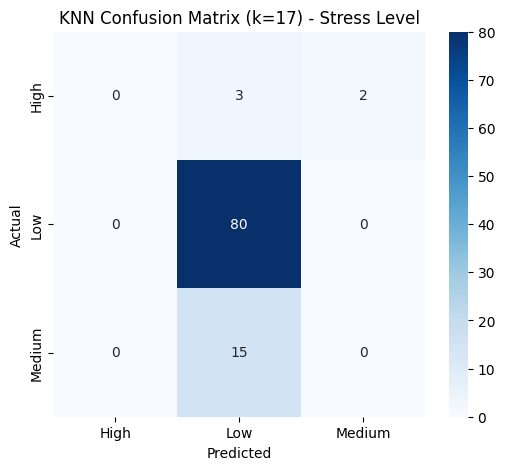

In [18]:
# Copy dataset
knn_df = original_df.copy()

# Convert continuous Stress_level to categories
knn_df['Stress_category'] = pd.cut(knn_df['Stress_level'], bins=[-float('inf'), 25, 40, float('inf')],
                                   labels=['Low','Medium','High'])

# Features and target
X = knn_df.drop(columns=['Stress_level','Stress_category'])
y = knn_df['Stress_category']

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Low=0, Medium=1, High=2

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different K values
k_values = [17, 19, 20, 21, 23]
accuracy_dict = {}
conf_matrices = {}

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracy_dict[k] = acc
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    conf_matrices[k] = cm
    
    print(f"K = {k} : Accuracy = {acc:.4f}")

# Identify best K
best_k = max(accuracy_dict, key=accuracy_dict.get)
best_acc = accuracy_dict[best_k]
best_cm = conf_matrices[best_k]

print(f"\nBest K = {best_k} with Accuracy = {best_acc:.4f}")
print("Confusion Matrix for Best K:\n", best_cm)

# Plot confusion matrix for best K
plt.figure(figsize=(6,5))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN Confusion Matrix (k={best_k}) - Stress Level")
plt.show()

## 3. Decission Tree Classifier

Dataset copied successfully

Selected Useful Features:
Index(['Sleep_hours', 'Health_rating', 'Happiness_level', 'Sleep_quality',
       'Balanced_life'],
      dtype='object')

Decision Tree Classification Results:

Depth = 2 | Accuracy = 0.8600 | Precision = 0.4873 | Recall = 0.5028 | F1-score = 0.4949


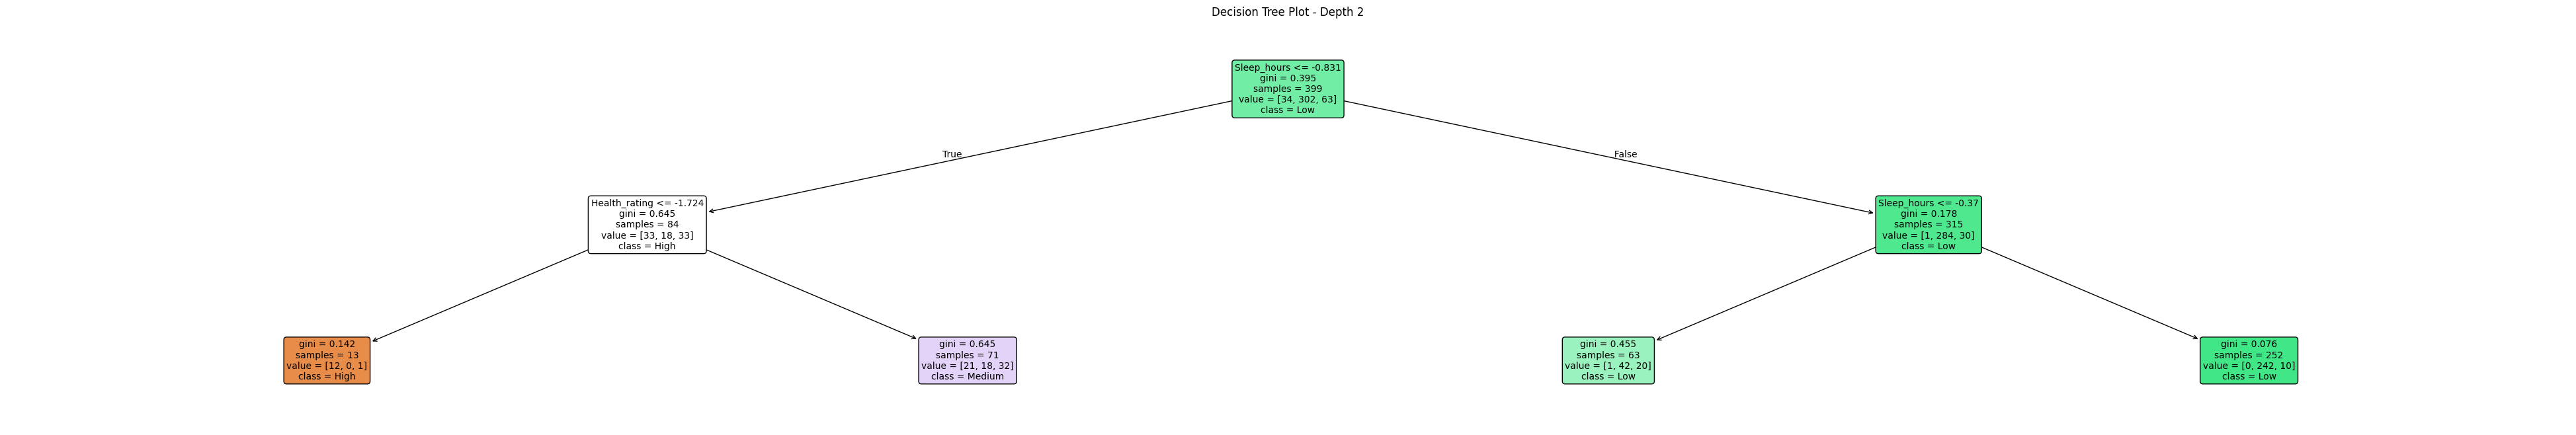

Depth = 3 | Accuracy = 0.8700 | Precision = 0.7037 | Recall = 0.6764 | F1-score = 0.6878


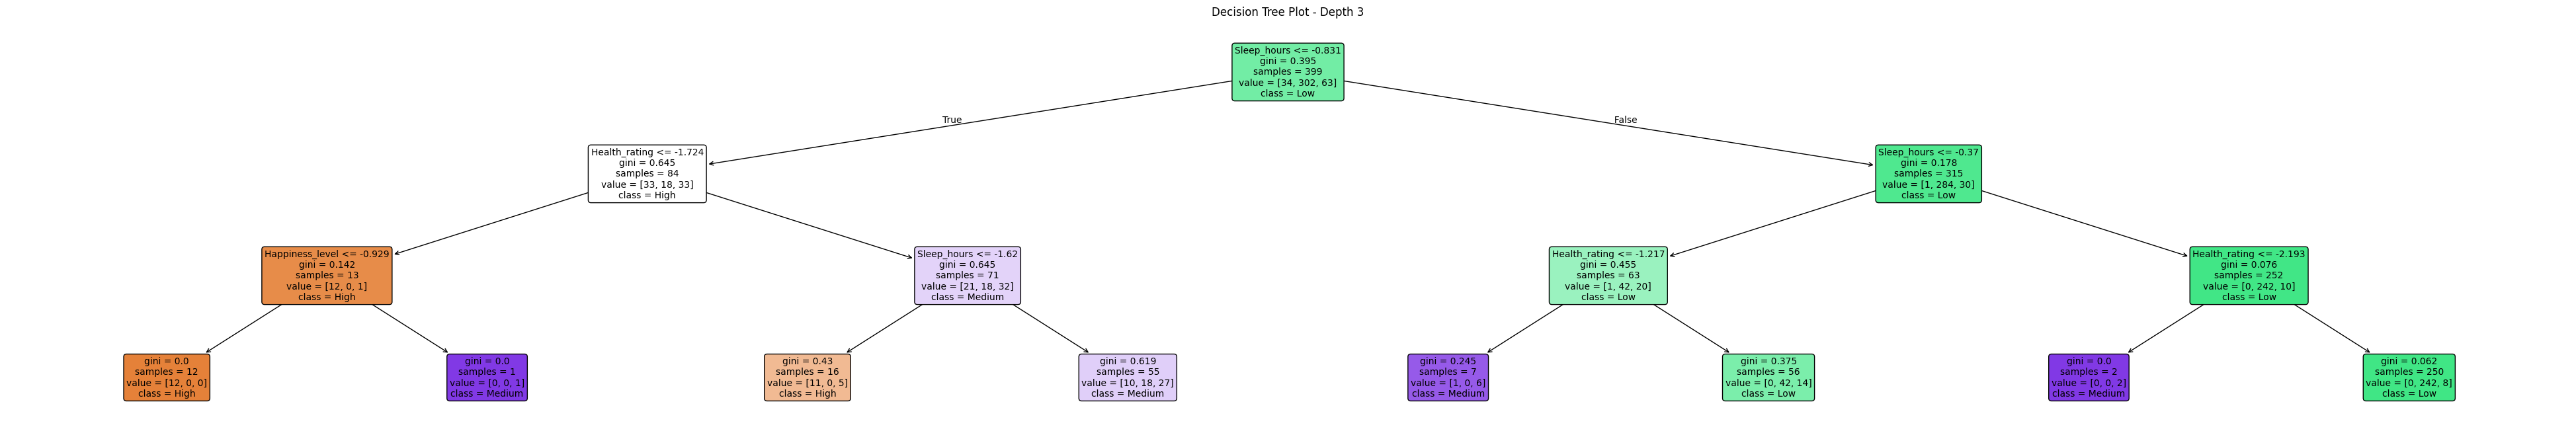

Depth = 4 | Accuracy = 0.8700 | Precision = 0.7037 | Recall = 0.6764 | F1-score = 0.6878


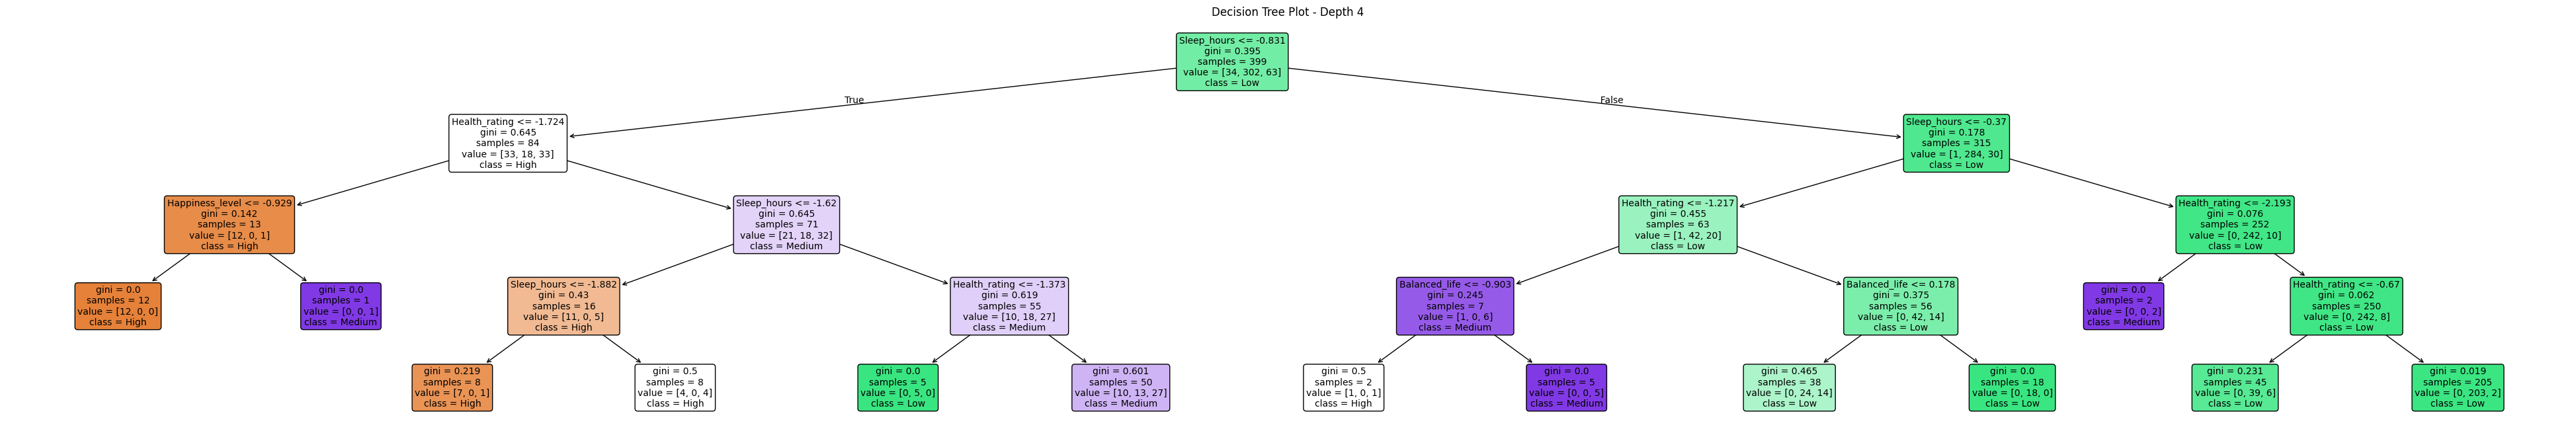

Depth = 5 | Accuracy = 0.8800 | Precision = 0.7749 | Recall = 0.6625 | F1-score = 0.7043


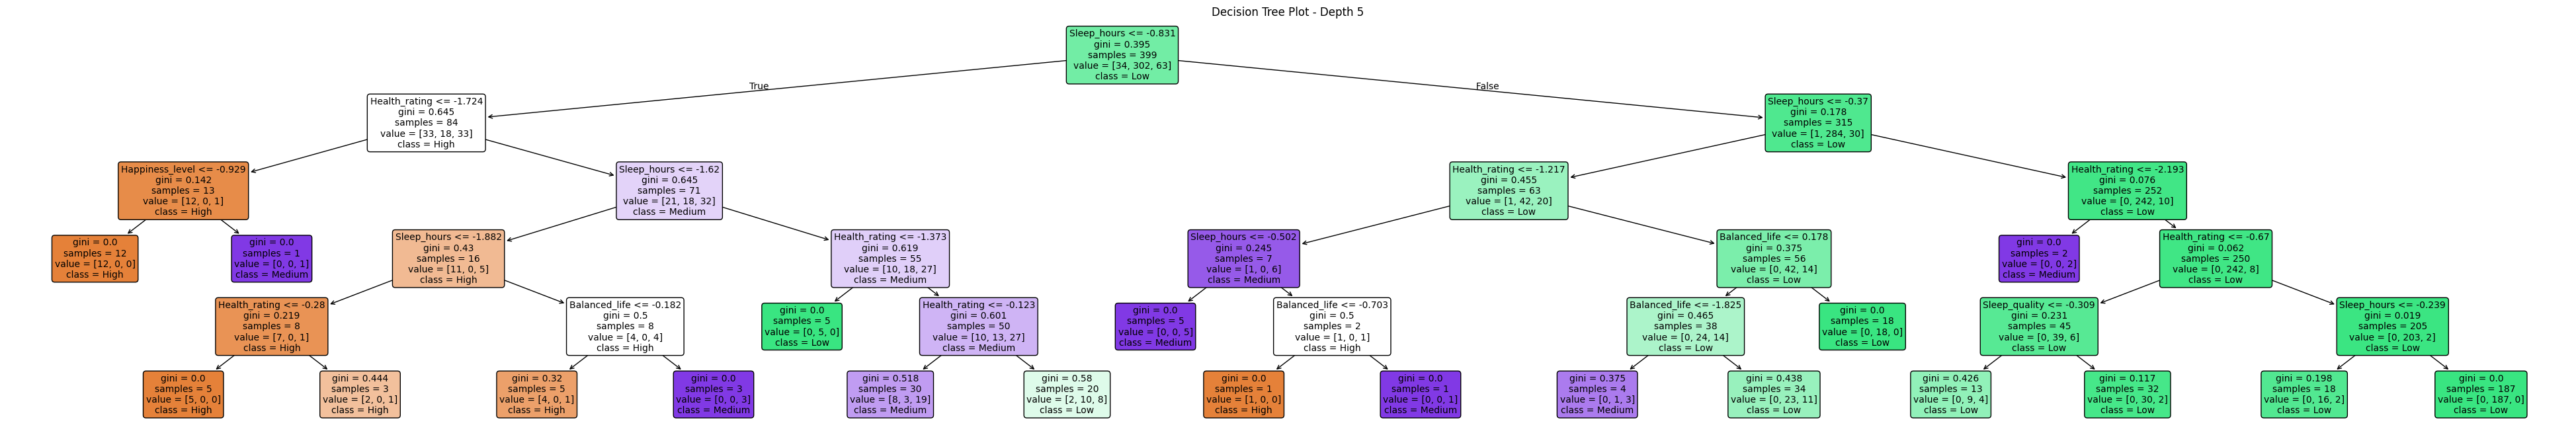

Depth = 6 | Accuracy = 0.8900 | Precision = 0.7817 | Recall = 0.7028 | F1-score = 0.7368


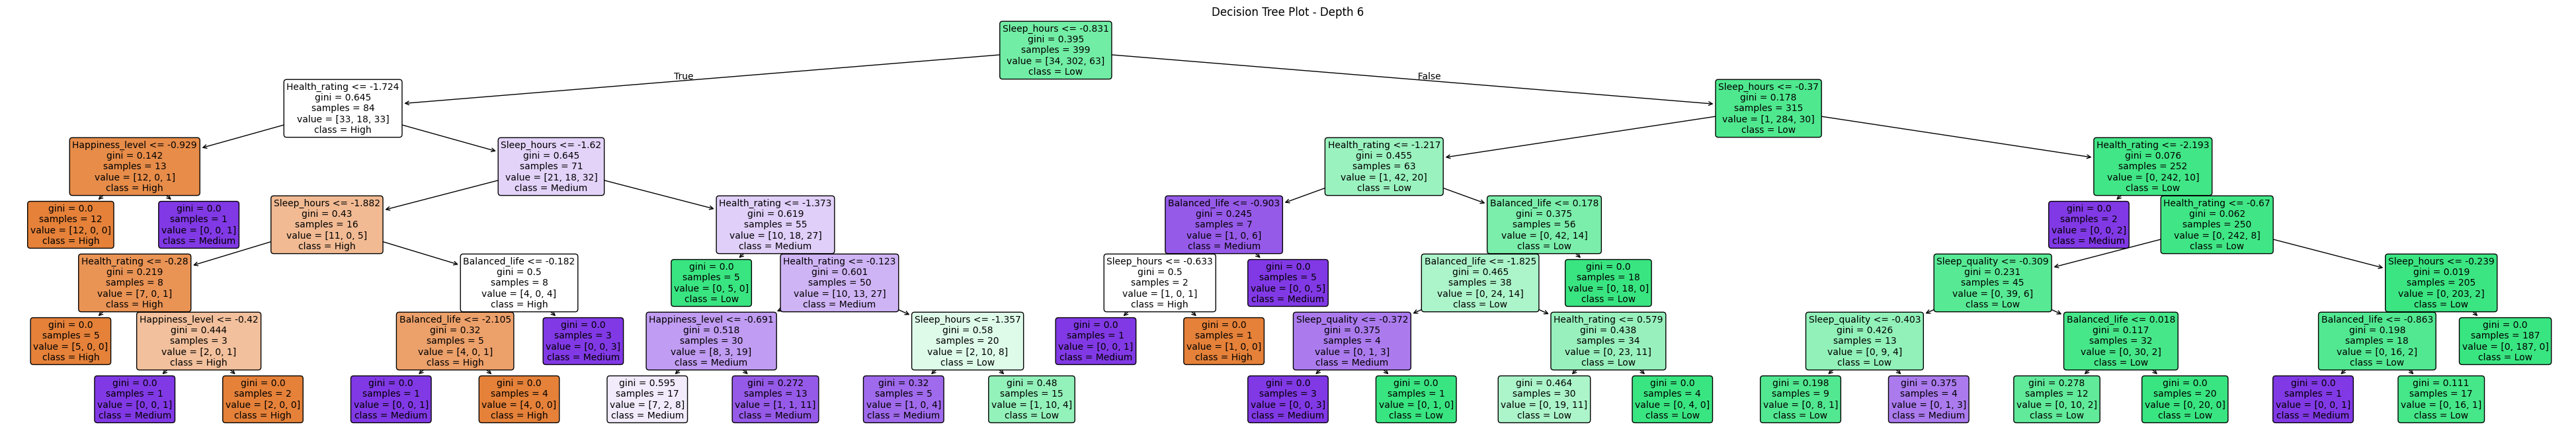

Depth = 7 | Accuracy = 0.8600 | Precision = 0.6577 | Recall = 0.6542 | F1-score = 0.6506


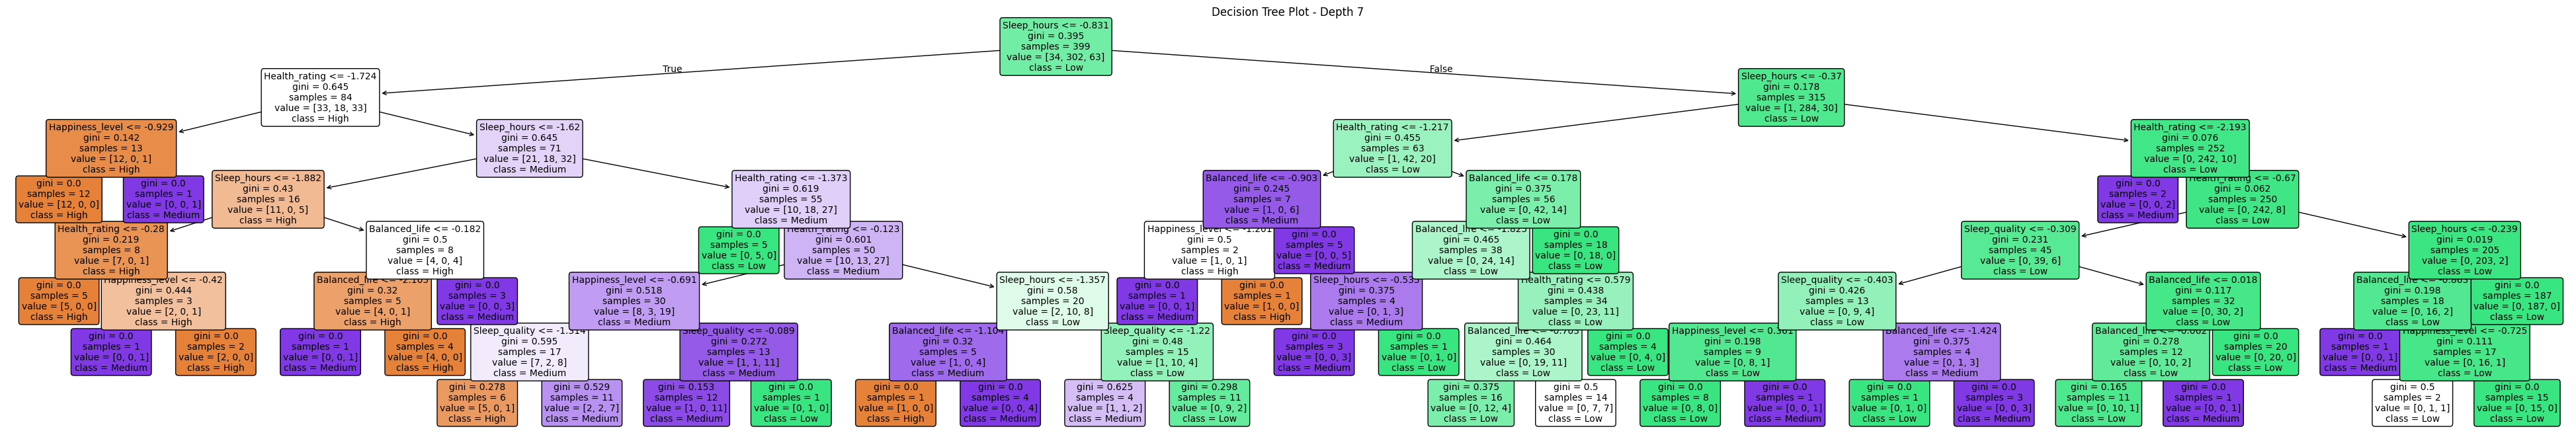

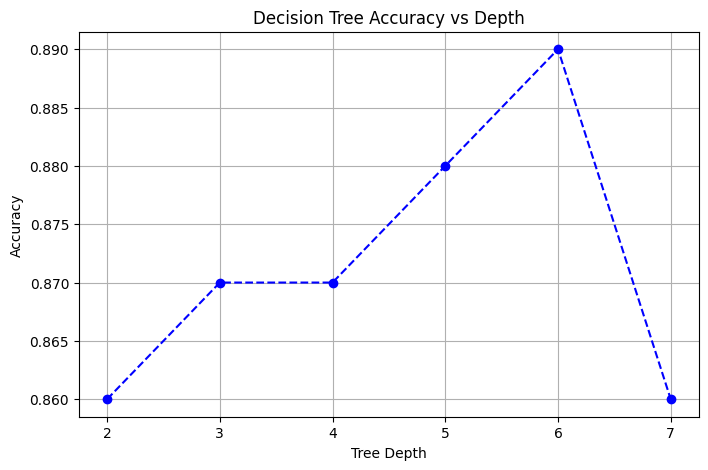


Best Depth = 6 with Accuracy = 0.8900


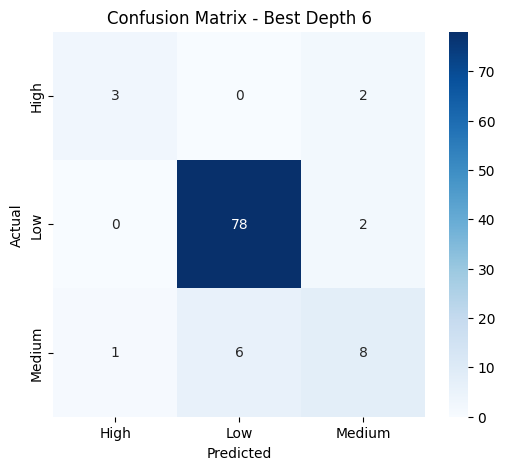

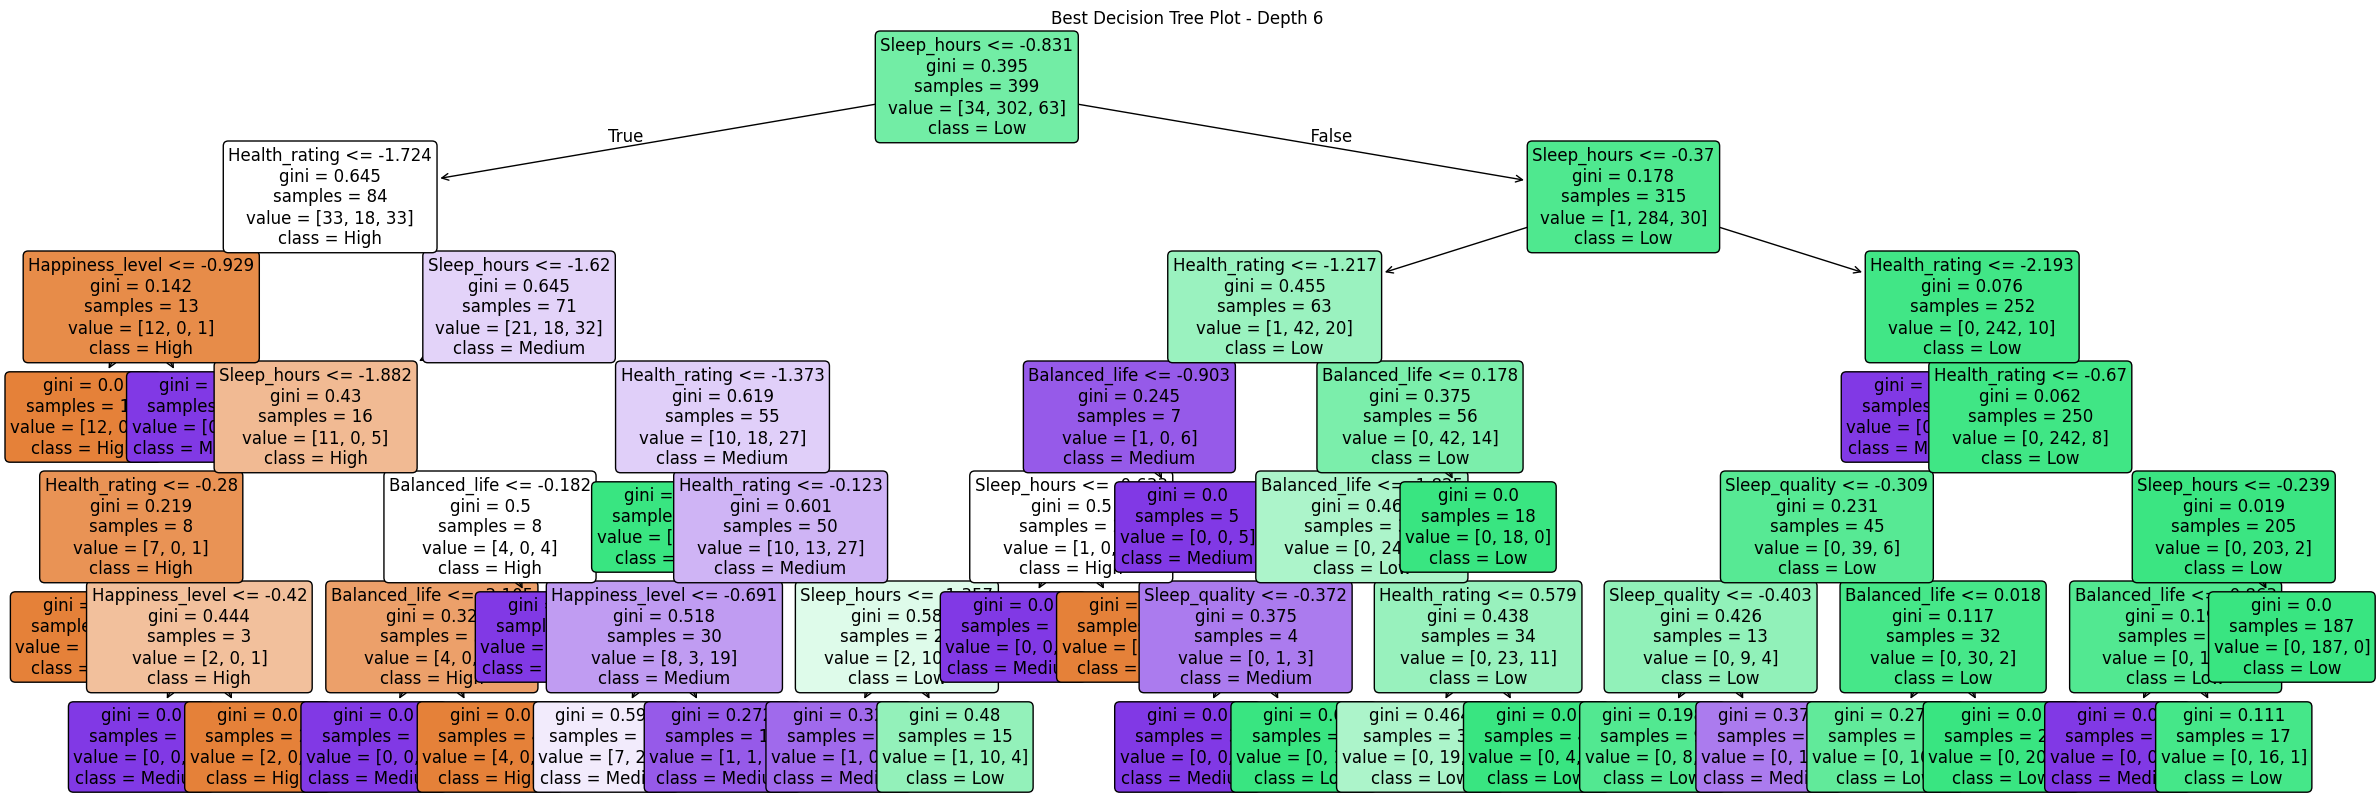

In [19]:
# Safe copy of dataset
dt_df = original_df.copy()
print("Dataset copied successfully")

# Convert continuous Stress_level to 3 categories
dt_df['Stress_category'] = pd.cut(dt_df['Stress_level'],
                                  bins=[-np.inf, 25, 40, np.inf],
                                  labels=['Low','Medium','High'])

# Target and Features
target = 'Stress_category'
X = dt_df.drop(columns=['Stress_level','Stress_category'])
y = dt_df[target]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Low=0, Medium=1, High=2

# Feature Selection: Select top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y_encoded)
selected_features = X.columns[selector.get_support()]
print("\nSelected Useful Features:")
print(selected_features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test different max_depth values
depth_values = [2, 3, 4, 5, 6, 7]
results = []

print("\nDecision Tree Classification Results:\n")

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    print(f"Depth = {depth} | Accuracy = {acc:.4f} | Precision = {prec:.4f} | Recall = {rec:.4f} | F1-score = {f1:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results.append((depth, acc, cm, model))
    
    # Plot Decision Tree
    plt.figure(figsize=(50,8))
    plot_tree(
        model,
        feature_names=selected_features,
        class_names=[str(cls) for cls in le.classes_],
        filled=True,
        rounded=True,
        fontsize=10
    )
    plt.title(f"Decision Tree Plot - Depth {depth}")
    plt.show()

# Plot Accuracy vs Depth
depth_list = [r[0] for r in results]
acc_list = [r[1] for r in results]

plt.figure(figsize=(8,5))
plt.plot(depth_list, acc_list, marker='o', linestyle='--', color='blue')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Accuracy vs Depth")
plt.grid(True)
plt.show()

# Best depth based on accuracy
best_info = max(results, key=lambda x: x[1])
best_depth = best_info[0]
best_acc = best_info[1]
best_cm = best_info[2]
best_model = best_info[3]

print(f"\nBest Depth = {best_depth} with Accuracy = {best_acc:.4f}")

# Confusion matrix for best depth
plt.figure(figsize=(6,5))
sns.heatmap(best_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Best Depth {best_depth}")
plt.show()

# Plot Decision Tree for best depth
plt.figure(figsize=(30,10))
plot_tree(
    best_model,
    feature_names=selected_features,
    class_names=[str(cls) for cls in le.classes_],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title(f"Best Decision Tree Plot - Depth {best_depth}")
plt.show()


## 4. Random Forest Classifier

Dataset copied successfully

Selected Useful Features:
Index(['Sleep_hours', 'Junk_food_freq', 'Alcohol', 'BMI', 'Health_rating',
       'Happiness_level', 'Productivity_score', 'Sleep_quality',
       'Health_category', 'Balanced_life'],
      dtype='object')

Random Forest (n_estimators=10) Metrics:
Accuracy: 0.84
Precision (macro): 0.6658249158249158
Recall (macro): 0.5472222222222222
F1-score (macro): 0.5873015873015873


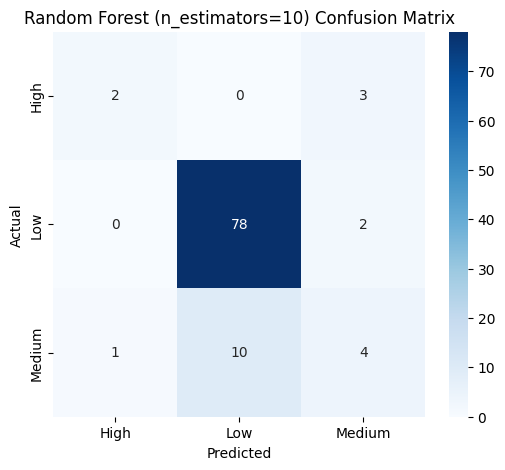


Random Forest (n_estimators=100) Metrics:
Accuracy: 0.89
Precision (macro): 0.7895348837209303
Recall (macro): 0.6847222222222222
F1-score (macro): 0.7261579651941098


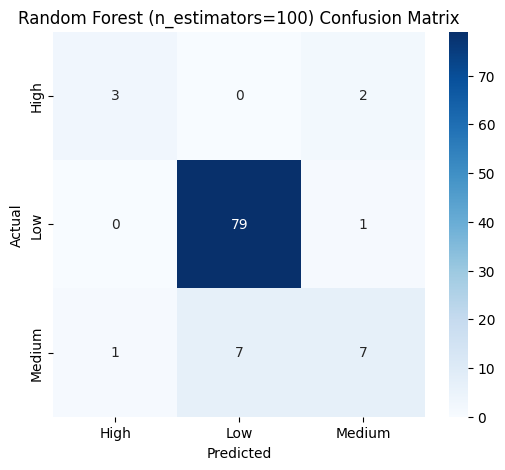


Random Forest (n_estimators=200) Metrics:
Accuracy: 0.89
Precision (macro): 0.7895348837209303
Recall (macro): 0.6847222222222222
F1-score (macro): 0.7261579651941098


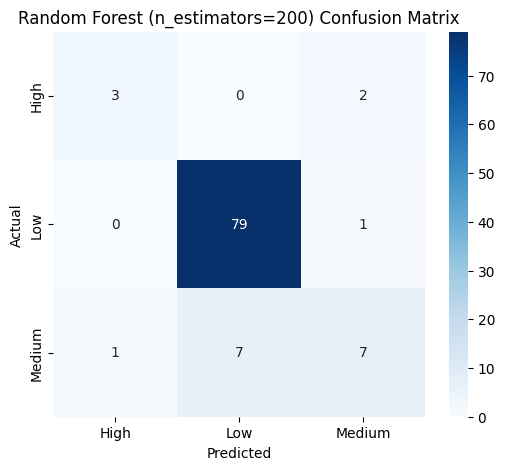


Random Forest (n_estimators=300) Metrics:
Accuracy: 0.89
Precision (macro): 0.7895348837209303
Recall (macro): 0.6847222222222222
F1-score (macro): 0.7261579651941098


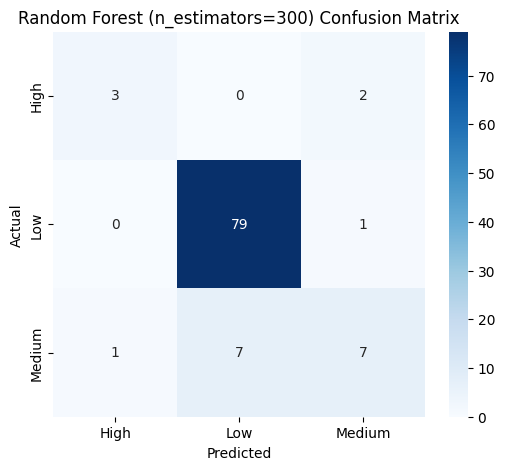

In [20]:
# Safe copy of dataset
rf_df = original_df.copy()
print("Dataset copied successfully")

# Convert Stress_level to 3 categories
rf_df['Stress_category'] = pd.cut(rf_df['Stress_level'],
                                  bins=[-np.inf, 25, 40, np.inf],
                                  labels=['Low','Medium','High'])

# Target and Features
target = 'Stress_category'
X = rf_df.drop(columns=['Stress_level','Stress_category'])
y = rf_df[target]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Low=0, Medium=1, High=2

# Feature Selection: top 10 useful features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y_encoded)
selected_features = X.columns[selector.get_support()]
print("\nSelected Useful Features:")
print(selected_features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest with different n_estimators
for n in [10, 100, 200, 300]:
    print(f"\nRandom Forest (n_estimators={n}) Metrics:")
    rf_model = RandomForestClassifier(class_weight='balanced',n_estimators=n, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    y_pred = rf_model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    print("Accuracy:", acc)
    print("Precision (macro):", prec)
    print("Recall (macro):", rec)
    print("F1-score (macro):", f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Random Forest (n_estimators={n}) Confusion Matrix")
    plt.show()


## 5. SVM Classifier

Dataset copied successfully

Selected Useful Features:
Index(['Sleep_hours', 'Junk_food_freq', 'Alcohol', 'BMI', 'Health_rating',
       'Happiness_level', 'Productivity_score', 'Sleep_quality',
       'Health_category', 'Balanced_life'],
      dtype='object')

SVM Classifier (Kernel=linear) Metrics:
Accuracy: 0.89
Precision (macro): 0.861437908496732
Recall (macro): 0.7027777777777778
F1-score (macro): 0.7626823793490459


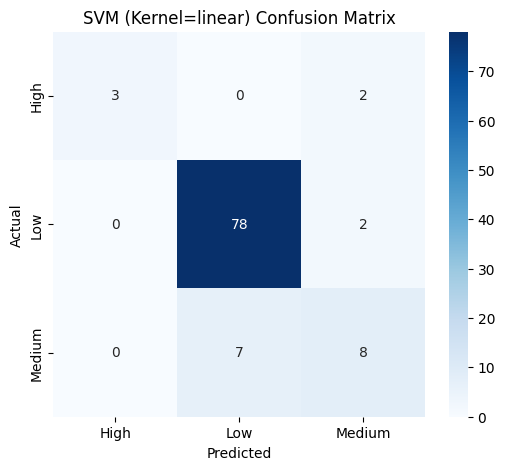


SVM Classifier (Kernel=rbf) Metrics:
Accuracy: 0.86
Precision (macro): 0.8262273901808785
Recall (macro): 0.6097222222222222
F1-score (macro): 0.6725526444401946


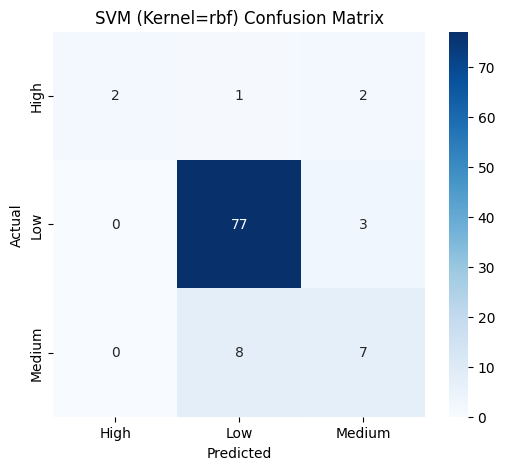

In [21]:
# Safe copy of dataset
svm_df = original_df.copy()
print("Dataset copied successfully")

# Convert Stress_level to 3 categories
svm_df['Stress_category'] = pd.cut(
    svm_df['Stress_level'],
    bins=[-np.inf, 25, 40, np.inf],
    labels=['Low', 'Medium', 'High']
)

# Target and Features
target = 'Stress_category'
X = svm_df.drop(columns=['Stress_level','Stress_category'])
y = svm_df[target]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Low=0, Medium=1, High=2

# Feature Selection: top 10 useful features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y_encoded)
selected_features = X.columns[selector.get_support()]
print("\nSelected Useful Features:")
print(selected_features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM Kernels: Linear and RBF
kernels = ['linear', 'rbf']

for kernel in kernels:
    print(f"\nSVM Classifier (Kernel={kernel}) Metrics:")
    
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    
    y_pred = svm_model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    print("Accuracy:", acc)
    print("Precision (macro):", prec)
    print("Recall (macro):", rec)
    print("F1-score (macro):", f1)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"SVM (Kernel={kernel}) Confusion Matrix")
    plt.show()


## 6. Naive Bayes (GaussianNB) classifier

Dataset copied successfully

Selected Useful Features:
Index(['Sleep_hours', 'Junk_food_freq', 'Alcohol', 'BMI', 'Health_rating',
       'Happiness_level', 'Productivity_score', 'Sleep_quality',
       'Health_category', 'Balanced_life'],
      dtype='object')

Gaussian Naive Bayes Metrics:
Accuracy: 0.87
Precision (macro): 0.7039556962025316
Recall (macro): 0.7125
F1-score (macro): 0.7080137959018056


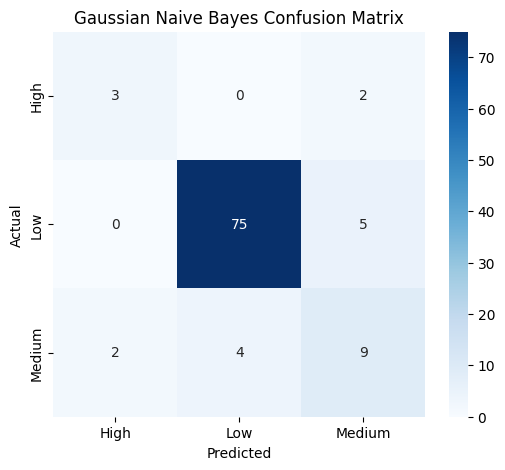

In [22]:
# Safe copy of dataset
nb_df = original_df.copy()
print("Dataset copied successfully")

# Convert Stress_level to 3 categories
nb_df['Stress_category'] = pd.cut(
    nb_df['Stress_level'],
    bins=[-np.inf, 25, 40, np.inf], 
    labels=['Low', 'Medium', 'High']
)

# Target and Features
target = 'Stress_category'
X = nb_df.drop(columns=['Stress_level', 'Stress_category'])
y = nb_df[target]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Low=0, Medium=1, High=2

# Feature Selection: top 10 useful features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y_encoded)
selected_features = X.columns[selector.get_support()]
print("\nSelected Useful Features:")
print(selected_features)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_encoded, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = nb_model.predict(X_test_scaled)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

print("\nGaussian Naive Bayes Metrics:")
print("Accuracy:", acc)
print("Precision (macro):", prec)
print("Recall (macro):", rec)
print("F1-score (macro):", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.show()


# K-Means Clustering

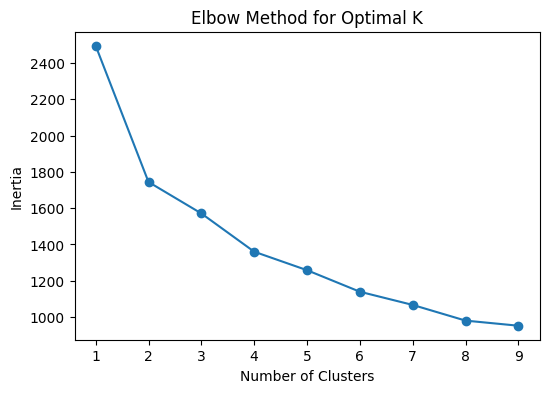

In [23]:
# Copy dataset
kmeans_df = original_df.copy()

# Select features for clustering
features = ['BMI', 'Stress_level', 'Sleep_quality', 'Balanced_life', 'Productivity_score']
X = kmeans_df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

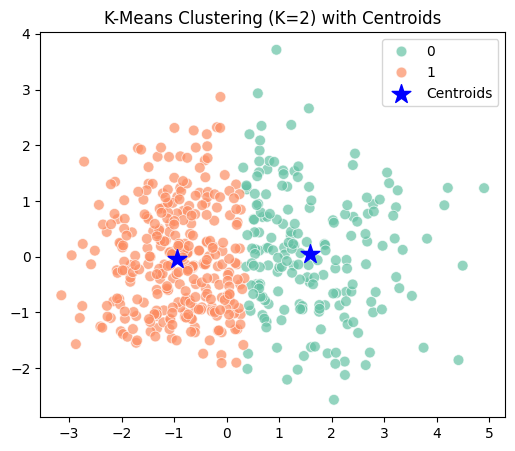

In [24]:
# Train KMeans with chosen K (example K=2)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
kmeans_df['Cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

# Transform centroids to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot clusters and centroids
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=60, alpha=0.7)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], color='blue', marker='*', s=200, label='Centroids')
plt.title(f"K-Means Clustering (K={k}) with Centroids")
plt.legend()
plt.show()


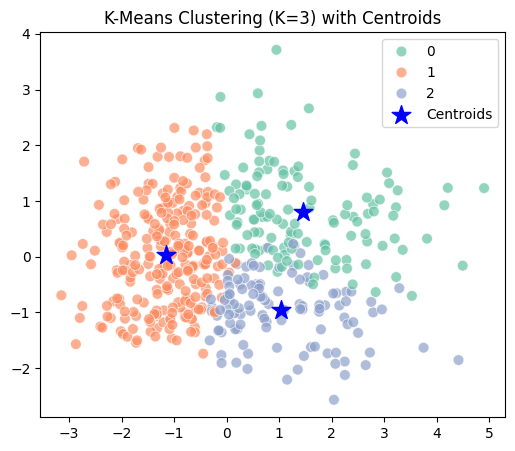

In [25]:
# Train KMeans with chosen K (example K=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
kmeans_df['Cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

# Transform centroids to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot clusters and centroids
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=60, alpha=0.7)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], color='blue', marker='*', s=200, label='Centroids')
plt.title(f"K-Means Clustering (K={k}) with Centroids")
plt.legend()
plt.show()


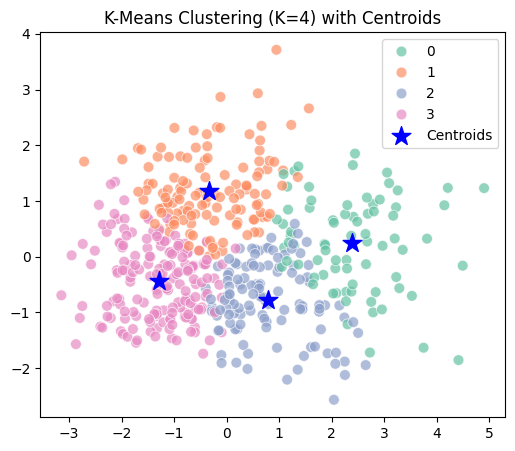

In [26]:
# Train KMeans with chosen K (example K=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
kmeans_df['Cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

# Transform centroids to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot clusters and centroids
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=60, alpha=0.7)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], color='blue', marker='*', s=200, label='Centroids')
plt.title(f"K-Means Clustering (K={k}) with Centroids")
plt.legend()
plt.show()


# Hierarchical Clustering

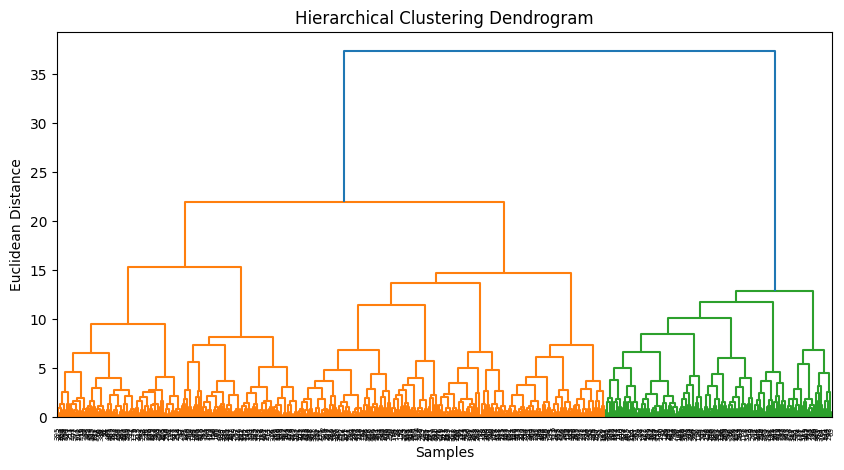

In [27]:
# Copy dataset
hier_df = original_df.copy()

# Select features for clustering
features = ['BMI', 'Stress_level', 'Sleep_quality', 'Balanced_life', 'Productivity_score']
X = hier_df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dendrogram to determine optimal clusters
plt.figure(figsize=(10, 5))
linked = linkage(X_scaled, method='ward')  # Ward linkage for hierarchical clustering
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

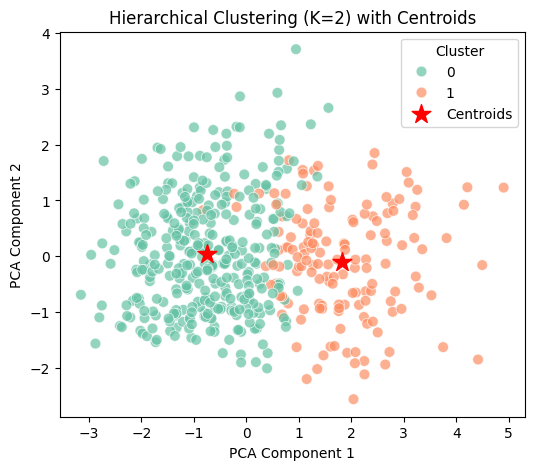

In [28]:
# Choose number of clusters 2
n_clusters = 2
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
clusters = hc.fit_predict(X_scaled)
hier_df['Cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

# Compute cluster centroids in PCA space
centroids = np.array([X_pca[clusters == i].mean(axis=0) for i in range(n_clusters)])

# Plot clusters with centroids
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=60, alpha=0.7)
plt.scatter(centroids[:,0], centroids[:,1], color='red', marker='*', s=200, label='Centroids')
plt.title(f"Hierarchical Clustering (K={n_clusters}) with Centroids")
plt.legend(title="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

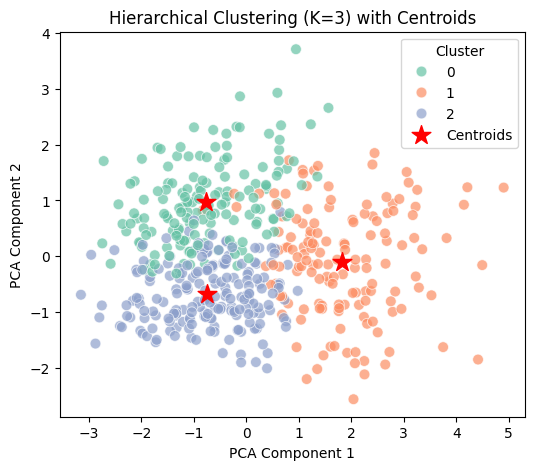

In [29]:
# Choose number of clusters 3
n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
clusters = hc.fit_predict(X_scaled)
hier_df['Cluster'] = clusters

# PCA for 2D visualization
pca = PCA(n_components=len(features))
X_pca = pca.fit_transform(X_scaled)

# Compute cluster centroids in PCA space
centroids = np.array([X_pca[clusters == i].mean(axis=0) for i in range(n_clusters)])

# Plot clusters with centroids
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=60, alpha=0.7)
plt.scatter(centroids[:,0], centroids[:,1], color='red', marker='*', s=200, label='Centroids')
plt.title(f"Hierarchical Clustering (K={n_clusters}) with Centroids")
plt.legend(title="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()